# Starbucks Capstone Challenge

# Introduction


For this project, we will have an opportunity to analyse Starbucks mobile app customer base data and their responses towards promotion offers. First we will explore, clean the data and then make exploratory analysis to find out customer based statistic. Subseqently, we aim to make on what the app should make recommendation offer to the new customer on the app with a machine learning model

## About Starbucks and Mobile App Program

### Starbuck
Starbucks Corporation is an American multinational chain of coffeehouses and roastery reserves headquartered in Seattle, Washington since 1971[1]. It is currently the world's largest coffeehouse chain store, serving a variety of beverages from hot/cold coffee/tea to the In addition to drinks and food, many stores carry Starbucks' official merchandise, such as mugs, tumblers, scoops, and coffee presses. Not limited to store front sales, drinks (canned drink, expresso capsules) sporting Starbuck label has appeared in supermarket and online shops[2]

### Mobile Application
Starbucks is one of the early adopter of mobile application. In May 2008, a loyalty program was introduced for Starbucks Card registered users offering perks such as free Wi-Fi Internet access etc. 3 Years on, it began beta testing its mobile app for the Starbucks card, offering prepaid services. Subsequently, Starbucks released its complete mobile platform by January 2011. By December 2011, the number of mobile transactions exceeded 26 million. It is estimated that 30% of the Starbuck transactions is through mobile compared to Apple Pay, which is only used by ~5% of customers in 2018 [3]

## Information on Data Set
The provided data set for this project contains simulated data (containing transactions, customer spread and offer types) which mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks and not every user will have the same offer offered to the next

#### Validity Period
Every offer has a validity period before the offer expires. For example, a BOGO offer might be valid for only 5 days. The data set contains also informational offers which are merely providing information about a product. Accordingly, if an informational offer has 7 days of validity, one can assumed the customer is under the influence of the offer for 7 days after receiving the advertisement. It can be shown from the transactional data shows the timestamp of each purchase as well as the amount of money spent when user make purchases on the app. The transactional data also has a record for each offer that a user receives, a record for when a user actually views the offer and finally when a user completes an offer. 

Conversely, user should also note that it is possible that a customer using the app might make a purchase through the app without having received an offer or seen an offer.

#### Rewards System
To give an example how the reward process works, a user could receive a discount offer buy 10 dollars get 2 off. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer. 

It has also to be considered that a customer can receive an offer, never actually views the offer, and still completes the offer. For example, a customer might receive the "buy 10 dollars get 2 dollars off offer", but never opens the offer during the 10 day validity period, while he spends 15 dollars during those ten days. Thus there will be an offer completion record in the data set while the customer was not influenced by the offer.[2]

## On Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Part I : Define the business problem

The first part of our studies is to define our business problem
<ol>
    <li> What is the age, gender and income demographics of the customer group? Who formed the majority of the Starbucks customer base ?</li>
    <li> Which is the most effective channel in dispensing out information </li>
    <li> Which group (age, income, membership length) of customers appear to be more responsive towards the promotion
    <li> Is there link between the offer given and the target group? </li>
    <li> Which type of promotional offer most appeal to which group of customer?</li>
    <li>Can we build a recommendation engine to recommend promotional offer with good uptake rate to new customers based on their demographical data age, income, registration date and gender?</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn import preprocessing

%matplotlib inline

## to debug ipython
from IPython.core.debugger import set_trace

# read in the json files
portfolio   = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile     = pd.read_json('data/profile.json',   orient='records', lines=True)
transcript  = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
## update the pandas package as suggested above

# if (float(pd.__version__) > 1.53):
#     print('version is greater')
# !conda update pandas

# Part II : Analyze


We will analyze the problem(with the 3 pandas DataFrame) through visualizations and data exploration to have a better understanding of what algorithms and features are appropriate for solving it.

### Portfolio

In [3]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [4]:
portfolio.describe(include='all')

,reward,channels,difficulty,duration,offer_type,id
count,10.000000,10,10.000000,10.000000,10,10
unique,NaN,4,NaN,NaN,3,10
top,NaN,"[web, email, mobile, social]",NaN,NaN,bogo,ae264e3637204a6fb9bb56bc8210ddfd
freq,NaN,4,NaN,NaN,4,1
mean,4.200000,NaN,7.700000,6.500000,NaN,NaN
std,3.583915,NaN,5.831905,2.321398,NaN,NaN
min,0.000000,NaN,0.000000,3.000000,NaN,NaN
25%,2.000000,NaN,5.000000,5.000000,NaN,NaN
50%,4.000000,NaN,8.500000,7.000000,NaN,NaN
75%,5.000000,NaN,10.000000,7.000000,NaN,NaN


In [5]:
portfolio.isna().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

### Description of Portfolio Data

This data contains 10 campaign offers that is run together with Starbuck Customer, of which there are 3 types of promotion types being offered and the campaign offers is run with up to 4 types of channels. There is no missing data in the set and so we did not need to impute any value. Below tells of the detail for each column

**portfolio.json schema**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer, - cost to consumer
* reward (int) - reward given for completing an offer - cost to Starbuck
* duration (int) - time for offer to be open, in days
* channels (list of strings), ie web, email, mobile, social

### The following cleansing work would be neccessary
<ol> 
    <li> To expand the channels column into multiple columns based on the list atttribute: namely web, email, mobile and social  
    <li> To drop some of the channels namely channels and email. Email is used in every info campaign while channels have been expanded and is redundant
    <li> To expand the offer_type, a form of categorical data, into individual columns
    <li> Convert the duration to number of hours instead of days
    <li> Normalize some of the value 
</ol>

### Profile

In [6]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [7]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


To find out how many person is of age 118

In [8]:
profile.age[profile.age==118].count()

2175

In [9]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

The number of people with age 118 matches with the number of people without gender and without income data

### Description of Profile Data

This data contains the individual customer profile(age, income, gender etc) and let one have an idea of what is the general Starbuck customer are.

A glimpse at the data show there is a number of customers, (2175 to be exact) at 118 year old! A small trivial[4], the oldest known living person  has managed to live a year of 122 and the number of people who have live to that age is not more than 10. Starbucks could not possibly get so many customer who is of 118. <br>

A plausible explanation could be that the customer refuse to leave his/her identity information. The number of customer who did not have their gender, income or age is the same, 2175. We might be wanting to remove this set of user, even though it represented about 10% of the total user database

We might also want to convert the became member 

**profile.json schema**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

The following cleansing work would be neccessary

<ol> 
    <li> To drop the members with 118 years of age     
    <li> To convert "became_member_on" to "membership". Would need to change from string format YYYYMMDD representatation to one that is based on year they have been member
    <li> Normalize some of the value 
</ol>

### Transcript

In [10]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [11]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [12]:
transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [13]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

But it must be stressed the transcript count presented here includes transaction of people with missing profile information which we will not use eventually

### Description of Transcript Data



This data contains the transaction detail (whether be it giving the offer, or completing the offer) in time sequence

**transcript.json**

    event (str) - record description of type transaction, offer received, offer viewed, offer completed
    person (str) - customer id
    time (int) - time in hours since start of test. The data begins at time t=0
    value - (dict of strings) - either an offer id or transaction amount depending on the record


The following cleansing work would be neccessary 

<ol>
    <li> To remove transaction of those users which have been removed in profile json 
    <li> To expand the event column, a form of categorical data, into individual binary columns of transaction, offer received, offer viewed, offer completed
    <li> To make matter simple, formed a new column call campaign_success based on customer would have to view the offer and complete the offer, then it would consider as campaign success while completion of offer without actually viewing the offer would consider to be a failure
    <li> To extract out the value type into either one indicating of offer_id or transaction amount. Consideration is also taken to drop those transaction amount data
    <li> Normalize some of the value 
</ol>

Finally then combine the 3 dataframe to form a master dataframe

# Part III :  Data Cleansing

We perform cleaning and engineering for all data sets (portfolio, profile, transcript). In summary, we will focus on the below work direction:

<ul>
    <li> convert dtype of features where necessary eg from datetime to string or vice versa </li>
    <li> drop rows with missing data or outliers </li>
    <li> drop rows with duplicated data </li>
    <li> group data for further data analysis </li>
    <li> create new features with binaries from categorical variables </li>
    <li> normalize data for columns with a different range of values </li>
</ul>

Cleaning up the portfolio dataset

In [14]:
## copy a copy of the portfolio dataset
portfolio_df  = portfolio.copy()

Create new columns(web, emaiil,mobile & social) from channels

In [15]:
channels_list  =  ['web', 'email', 'mobile', 'social'] 

for index in channels_list: 
    portfolio_df[index] = portfolio_df.channels.apply(lambda x: (index in x)+0)

print(portfolio_df)

   reward                      channels  difficulty  duration     offer_type  \
0      10       [email, mobile, social]          10         7           bogo   
1      10  [web, email, mobile, social]          10         5           bogo   
2       0          [web, email, mobile]           0         4  informational   
3       5          [web, email, mobile]           5         7           bogo   
4       5                  [web, email]          20        10       discount   
5       3  [web, email, mobile, social]           7         7       discount   
6       2  [web, email, mobile, social]          10        10       discount   
7       0       [email, mobile, social]           0         3  informational   
8       5  [web, email, mobile, social]           5         5           bogo   
9       2          [web, email, mobile]          10         7       discount   

                                 id  web  email  mobile  social  
0  ae264e3637204a6fb9bb56bc8210ddfd    0      1      

Convert offer_type from categorical into numerical data

In [16]:
portfolio_df.offer_type = portfolio_df.offer_type.replace([ 'informational', 'bogo', 'discount'],
                          [0, 1, 2])

Changing the duration from day into hours

In [17]:
portfolio_df.duration  = portfolio_df.duration * 24

#### Cleaning up profile dataframe

changing the "became_member_on" to member since the earliest date

In [18]:
## make a copy of profile
profile_df = profile.copy()

Removing the anonmynous user with age 118, no gender and income information

In [19]:
profile_df = profile_df[profile_df.age!=118]
profile_df_size = 17000-2175

### sanity check on profile - after removing
assert profile_df.shape[0] >= profile_df_size , "the size is not right"

Changing the data in column "became_member_on" to "membership"

In [20]:
## rename the columns
profile_df.rename(columns = {'became_member_on':'membership'}, inplace=True)
                             
base_year  = int(profile_df.membership.max() /10000) 
profile_df['membership']= profile_df.membership.apply(lambda x: base_year - int(x/10000))

print(profile_df)

      gender  age                                id  membership    income
1          F   55  0610b486422d4921ae7d2bf64640c50b           1  112000.0
3          F   75  78afa995795e4d85b5d9ceeca43f5fef           1  100000.0
5          M   68  e2127556f4f64592b11af22de27a7932           0   70000.0
8          M   65  389bc3fa690240e798340f5a15918d5c           0   53000.0
12         M   58  2eeac8d8feae4a8cad5a6af0499a211d           1   51000.0
...      ...  ...                               ...         ...       ...
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7           0   54000.0
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77           0   72000.0
16997      M   49  01d26f638c274aa0b965d24cefe3183f           1   73000.0
16998      F   83  9dc1421481194dcd9400aec7c9ae6366           2   50000.0
16999      F   62  e4052622e5ba45a8b96b59aba68cf068           1   82000.0

[14825 rows x 5 columns]


Creating a master dataframe to hold all the data

#### Cleaning up transcript dataframe

In [21]:
transcript_df = transcript.copy()

Removing those records whose user does not appear in the new profile dataframe

In [22]:
transcript_df = transcript_df.value.apply(lambda x: (index in x)+0)

transcript_df = transcript[transcript['person'].isin(profile_df['id'])]

transcript_df.count()

person    272762
event     272762
value     272762
time      272762
dtype: int64

We have almost removed 10% of the records in transcript

In [23]:
transcript_df.event.value_counts()

transaction        123957
offer received      66501
offer viewed        49860
offer completed     32444
Name: event, dtype: int64

Changing the event categories into individual columns (binary) and then rename them

In [24]:
event_list  =  ['transaction', 'offer received', 'offer viewed', 'offer completed'] 

transcript_df_events = pd.DataFrame()

for index in event_list: 
    transcript_df_events[index] = transcript_df.event.apply(lambda x: 1 if x == index else 0 )

### rename 
transcript_df_events.rename(columns={"offer received": "offer_received",
                                     "offer viewed": "offer_viewed", 
                                     "offer completed": "offer_completed"}, inplace=True)

### print out for view
print(transcript_df_events)

        transaction  offer_received  offer_viewed  offer_completed
0                 0               1             0                0
2                 0               1             0                0
5                 0               1             0                0
7                 0               1             0                0
8                 0               1             0                0
...             ...             ...           ...              ...
306527            0               0             0                1
306529            1               0             0                0
306530            1               0             0                0
306531            1               0             0                0
306532            1               0             0                0

[272762 rows x 4 columns]


In [25]:
### find out the events categories and number
transcript_df_events.sum()

transaction        123957
offer_received      66501
offer_viewed        49860
offer_completed     32444
dtype: int64

Changing the values categories into individual columns (binary)

In [26]:
value_list  =  ['amount', 'offer_id', 'offer id'] 

transcript_df_value = pd.DataFrame()

for index in value_list: 
    transcript_df_value[index] = transcript_df.value.apply(lambda x: x.get(index) if x.get(index) != None else "" )

transcript_df_value['offer_id']   = transcript_df_value['offer_id']  + transcript_df_value['offer id'] 
transcript_df_value.drop('offer id', axis=1, inplace=True)
print(transcript_df_value)

       amount                          offer_id
0              9b98b8c7a33c4b65b9aebfe6a799e6d9
2              2906b810c7d4411798c6938adc9daaa5
5              f19421c1d4aa40978ebb69ca19b0e20d
7              3f207df678b143eea3cee63160fa8bed
8              0b1e1539f2cc45b7b9fa7c272da2e1d7
...       ...                               ...
306527         fafdcd668e3743c1bb461111dcafc2a4
306529   1.59                                  
306530   9.53                                  
306531   3.61                                  
306532   3.53                                  

[272762 rows x 2 columns]


Concatenating the dataframe

In [27]:
frame = [transcript_df, transcript_df_events,transcript_df_value]

transcript_df = pd.concat(frame, axis=1)

In [28]:
transcript_df.isna().sum()

person             0
event              0
value              0
time               0
transaction        0
offer_received     0
offer_viewed       0
offer_completed    0
amount             0
offer_id           0
dtype: int64

In [29]:
print(transcript_df)

                                  person            event  \
0       78afa995795e4d85b5d9ceeca43f5fef   offer received   
2       e2127556f4f64592b11af22de27a7932   offer received   
5       389bc3fa690240e798340f5a15918d5c   offer received   
7       2eeac8d8feae4a8cad5a6af0499a211d   offer received   
8       aa4862eba776480b8bb9c68455b8c2e1   offer received   
...                                  ...              ...   
306527  24f56b5e1849462093931b164eb803b5  offer completed   
306529  b3a1272bc9904337b331bf348c3e8c17      transaction   
306530  68213b08d99a4ae1b0dcb72aebd9aa35      transaction   
306531  a00058cf10334a308c68e7631c529907      transaction   
306532  76ddbd6576844afe811f1a3c0fbb5bec      transaction   

                                                    value  time  transaction  \
0        {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0            0   
2        {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0            0   
5        {'offer id': 'f194

We would also need to filter out customers who completed the offer without recieving or viewing the offer to give a more balanced view. However first we would need to create a new dataframe

In [30]:
transcript_df.offer_received.sum()

66501

#### Master Dataframe
Finally we would want to create another DataFrame called offer which is based on every single offer made in the 10 campaign. The dataframe would include information from the 3 dataframe: 
<ul>
    <li> portfolio
    <li> profile
    <li> transaction
</ul>

From transaction data frame, we would pull the following rows that have recieved the offer and the following columns
<ul>
    <li>person
    <li>offer_id
    <li>offer_viewed 
    <li>offer_completed
    <li>offer_type
    <li>amount
</ul>

From portfolio data frame, we would pull the following columns
<ul>
     <li>reward
     <li>difficulty 
     <li>duration  
     <li>web
     <li>mobile
     <li>social
</ul>

From profile data frame, we would pull the following columns
<ul>
     <li>gender
     <li>age 
     <li>income  
     <li>membership
</ul>

In [31]:
### we made a copy of whatever we did until now
offer = transcript_df.copy()

#### get all the offer that were send out
offer = offer[offer.offer_received==1]

#### drop all the unused column
offer = offer.drop(['offer_received','event','value', 'time', 'transaction', 'amount'], axis=1)

### Check whether a person will recieved repeated offer

In [32]:
import pdb

offer_list = offer.person.unique() 
count      = 0

for offer_person in offer_list:
    tmp = offer.loc[offer.person == offer_person]
#     b = tmp.offer_id.duplicated().any()
    if(tmp.offer_id.duplicated().any()):    
        count += 1

print(count)
print(offer.index)

8684
Int64Index([     0,      2,      5,      7,      8,      9,     12,     13,
                14,     15,
            ...
            257876, 257877, 257879, 257880, 257881, 257882, 257883, 257884,
            257885, 257886],
           dtype='int64', length=66501)


In [33]:
def find_offer(df):
    index_r = df.index[df['offer_received']==1].values
    print(index)
    result  = index_r[-1]
    print(result)
    return result

In [34]:
transcript_df

,person,event,value,time,transaction,offer_received,offer_viewed,offer_completed,amount,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,0,1,0,0,,9b98b8c7a33c4b65b9aebfe6a799e6d9
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,0,1,0,0,,2906b810c7d4411798c6938adc9daaa5
5,389bc3fa690240e798340f5a15918d5c,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0,0,1,0,0,,f19421c1d4aa40978ebb69ca19b0e20d
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0,0,1,0,0,,3f207df678b143eea3cee63160fa8bed
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0,1,0,0,,0b1e1539f2cc45b7b9fa7c272da2e1d7
...,...,...,...,...,...,...,...,...,...,...
306527,24f56b5e1849462093931b164eb803b5,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714,0,0,0,1,,fafdcd668e3743c1bb461111dcafc2a4
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,1,0,0,0,1.59,
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,1,0,0,0,9.53,
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,1,0,0,0,3.61,


In [35]:
transcript_df_clean  = transcript_df[transcript_df.transaction == 0]

transcript_df_person_offerid = transcript_df_clean.groupby(['person', 'offer_id'])

for key, item in transcript_df_person_offerid:
    tmp = transcript_df_person_offerid.get_group(key)
    index = find_offer(tmp) 
    if tmp.offer_completed.sum() == 1:
        if tmp.offer_viewed.sum() == 1: 
            offer.loc[[index],'offer_completed'] = 1
            offer.loc[[index],'offer_viewed'] = 1
        else: 
            offer.loc[[index],'offer_viewed'] = 0
            offer.loc[[index],'offer_completed']  = 0

    if tmp.offer_viewed.sum() == 1:
            offer.loc[[index],'offer_viewed']  = 1

print(offer.index)

offer id
247879
247879
113605
113605
55972
55972
153401
153401
204340
204340
153697
153697
56298
56298
3066
3066
113919
113919
204643
204643
152505
152505
203452
203452
55085
55085
112698
112698
59352
59352
156808
156808
207725
207725
117013
117013
213364
213364
113473
113473
2652
2652
158081
158081
119202
119202
253486
253486
8354
8354
61565
61565
56591
56591
204926
204926
248476
248476
119263
119263
214247
214247
257855
257855
160621
160621
211524
211524
255121
255121
158549
158549
255342
255342
211734
211734
10168
10168
252368
252368
208825
208825
157908
157908
118095
118095
7250
7250
202364
202364
10597
10597
151420
151420
251754
251754
208185
208185
117475
117475
157286
157286
59824
59824
255028
255028
9874
9874
160535
160535
211440
211440
120852
120852
64315
64315
212717
212717
256331
256331
161823
161823
11128
11128
53750
53750
245702
245702
202153
202153
119016
119016
253311
253311
61377
61377
8180
8180
120633
120633
160447
160447
211347
211347
257829
257829
65796
65796
12590
1

114865
57197
57197
3895
3895
205486
205486
249048
249048
116765
116765
59109
59109
156569
156569
207477
207477
3307
3307
57862
57862
114169
114169
247764
247764
113480
113480
204224
204224
256163
256163
212556
212556
64162
64162
161661
161661
2584
2584
247686
247686
153208
153208
115141
115141
154883
154883
57468
57468
249385
249385
117398
117398
247065
247065
160341
160341
9434
9434
254579
254579
120285
120285
211015
211015
62643
62643
205545
205545
249104
249104
114860
114860
57192
57192
120241
120241
62587
62587
246519
246519
210964
210964
112135
112135
246418
246418
54488
54488
202887
202887
252584
252584
209043
209043
111880
111880
156854
156854
251318
251318
207767
207767
205378
205378
248935
248935
3776
3776
57033
57033
120033
120033
210763
210763
159839
159839
254308
254308
256131
256131
212522
212522
64131
64131
123455
123455
57289
57289
257800
257800
205116
205116
56776
56776
3543
3543
248664
248664
154181
154181
206787
206787
250351
250351
155882
155882
5199
5199
152486
1524

208426
60067
60067
251983
251983
113092
113092
247368
247368
203837
203837
249230
249230
205662
205662
154720
154720
114982
114982
1226
1226
246333
246333
151855
151855
202796
202796
116676
116676
59021
59021
12588
12588
255604
255604
121283
121283
161107
161107
59797
59797
157260
157260
9723
9723
62928
62928
254872
254872
211287
211287
62407
62407
159873
159873
254342
254342
211173
211173
254757
254757
62811
62811
59039
59039
156497
156497
250961
250961
5826
5826
253696
253696
159214
159214
8565
8565
210145
210145
210157
210157
61768
61768
119420
119420
10441
10441
212012
212012
161125
161125
121303
121303
6176
6176
59387
59387
207761
207761
202933
202933
54541
54541
152003
152003
250405
250405
155940
155940
58480
58480
116155
116155
154568
154568
114810
114810
205498
205498
249057
249057
4057
4057
249219
249219
205653
205653
154709
154709
121370
121370
255687
255687
63701
63701
10497
10497
161188
161188
122184
122184
256530
256530
162008
162008
212922
212922
11330
11330
213214
213214

10289
160968
160968
121143
121143
63489
63489
255473
255473
254440
254440
210884
210884
207097
207097
5532
5532
116411
116411
793
793
206202
206202
118739
118739
245899
245899
151884
151884
246356
246356
54424
54424
152204
152204
246664
246664
112391
112391
1565
1565
111413
111413
245704
245704
53753
53753
151203
151203
159030
159030
209956
209956
61585
61585
253501
253501
58803
58803
250718
250718
156262
156262
207159
207159
116465
116465
162524
162524
257056
257056
122701
122701
65040
65040
213453
213453
162344
162344
256865
256865
59960
59960
8573
8573
214005
214005
257603
257603
123247
123247
155979
155979
58526
58526
5306
5306
250449
250449
117130
117130
251393
251393
249026
249026
114779
114779
205465
205465
3871
3871
59170
59170
248146
248146
204608
204608
10327
10327
255508
255508
161004
161004
121180
121180
150820
150820
201780
201780
111037
111037
251869
251869
157398
157398
208305
208305
59949
59949
56327
56327
529
529
204671
204671
153724
153724
248212
248212
113949
113949


209410
7843
7843
61023
61023
118668
118668
111007
111007
249245
249245
154737
154737
201751
201751
53350
53350
64334
64334
161839
161839
115939
115939
256350
256350
54666
54666
246574
246574
1478
1478
151747
151747
111948
111948
246226
246226
117572
117572
6722
6722
208280
208280
251847
251847
157374
157374
122541
122541
205512
205512
64885
64885
59120
59120
251041
251041
156581
156581
207486
207486
116775
116775
5899
5899
111099
111099
278
278
245396
245396
201853
201853
53453
53453
115134
115134
249809
249809
206238
206238
57882
57882
4655
4655
115553
115553
160205
160205
62744
62744
120395
120395
254693
254693
257816
257816
214211
214211
12573
12573
8087
8087
158742
158742
118912
118912
253211
253211
65716
65716
214142
214142
257744
257744
12504
12504
203445
203445
55079
55079
152499
152499
1882
1882
205412
205412
248969
248969
154475
154475
57060
57060
54019
54019
202424
202424
249356
249356
115107
115107
9232
9232
210816
210816
159895
159895
62425
62425
254363
254363
11097
11097
1

203565
247094
247094
5084
5084
58316
58316
155759
155759
248488
248488
3365
3365
154002
154002
114235
114235
204934
204934
256552
256552
212946
212946
64546
64546
122208
122208
55241
55241
247131
247131
203601
203601
152644
152644
56193
56193
2968
2968
113827
113827
248090
248090
59682
59682
251616
251616
117339
117339
208046
208046
59054
59054
207417
207417
156510
156510
250973
250973
53615
53615
151056
151056
111273
111273
202007
202007
123
123
150728
150728
201693
201693
208119
208119
6556
6556
113797
113797
56161
56161
204533
204533
11160
11160
57262
57262
212751
212751
153162
153162
55738
55738
2537
2537
204114
204114
2496
2496
121799
121799
157285
157285
251753
251753
59823
59823
208184
208184
117474
117474
205637
205637
114959
114959
249201
249201
154694
154694
120368
120368
9035
9035
205697
205697
162078
162078
212993
212993
256597
256597
247949
247949
153475
153475
2838
2838
113683
113683
204422
204422
208721
208721
11061
11061
252277
252277
256760
256760
162236
162236
6005
60

63464
255450
255450
121122
121122
247027
247027
152547
152547
55135
55135
112744
112744
151976
151976
246443
246443
159178
159178
1323
1323
246428
246428
207735
207735
251285
251285
117023
117023
252591
252591
60682
60682
209051
209051
158135
158135
213367
213367
122612
122612
11763
11763
162440
162440
58717
58717
250637
250637
116378
116378
156169
156169
207070
207070
208470
208470
6897
6897
252024
252024
60109
60109
246915
246915
203388
203388
112640
112640
152443
152443
55017
55017
214139
214139
257742
257742
163228
163228
55420
55420
5928
5928
207515
207515
117435
117435
251717
251717
247609
247609
153124
153124
2508
2508
154747
154747
115007
115007
57338
57338
116416
116416
60321
60321
252239
252239
208676
208676
7556
7556
113563
113563
253726
253726
1705
1705
159241
159241
119435
119435
210174
210174
204507
204507
248031
248031
5305
5305
116198
116198
155978
155978
56133
56133
255663
255663
10477
10477
122994
122994
152428
152428
246898
246898
58100
58100
155543
155543
206452
206

156559
151222
151222
245725
245725
202178
202178
53770
53770
162225
162225
256749
256749
213140
213140
122400
122400
64745
64745
245964
245964
111683
111683
202418
202418
1247
1247
112072
112072
247376
247376
246431
246431
202896
202896
54500
54500
255308
255308
10133
10133
151801
151801
63325
63325
57488
57488
249407
249407
205829
205829
115162
115162
151808
151808
155240
155240
115477
115477
249728
249728
206158
206158
115551
115551
211616
211616
4749
4749
252739
252739
118458
118458
154975
154975
4320
4320
205902
205902
249469
249469
151692
151692
111895
111895
1067
1067
212201
212201
65408
65408
12191
12191
257426
257426
250446
250446
116195
116195
5302
5302
58523
58523
206345
206345
155431
155431
4760
4760
115659
115659
249501
249501
4352
4352
155008
155008
209125
209125
158204
158204
252665
252665
7555
7555
154142
154142
56737
56737
205077
205077
248622
248622
209980
209980
253529
253529
8400
8400
61609
61609
119639
119639
210382
210382
159451
159451
253931
253931
61991
61991
162

7685
154313
154313
3648
3648
205247
205247
112259
112259
203005
203005
1441
1441
204947
204947
151216
151216
65039
65039
257055
257055
11848
11848
213452
213452
247235
247235
152745
152745
203700
203700
203944
203944
59807
59807
117458
117458
2369
2369
113073
113073
247347
247347
55445
55445
152860
152860
152059
152059
112242
112242
246521
246521
1419
1419
209823
209823
253364
253364
61430
61430
123503
123503
65814
65814
257849
257849
163331
163331
163227
163227
251295
251295
256505
256505
11308
11308
64503
64503
212900
212900
122162
122162
61927
61927
253863
253863
159380
159380
210316
210316
119570
119570
10996
10996
121864
121864
256189
256189
161687
161687
201640
201640
110901
110901
150670
150670
256066
256066
161563
161563
11729
11729
162404
162404
213334
213334
53989
53989
111655
111655
151447
151447
116628
116628
207345
207345
250902
250902
156434
156434
213937
213937
65510
65510
257530
257530
203880
203880
55512
55512
393
393
247408
247408
112884
112884
208117
208117
2070
2070

60942
156461
156461
56223
56223
207374
207374
250927
250927
116657
116657
121991
121991
161828
161828
64320
64320
212721
212721
256335
256335
58565
58565
250484
250484
213001
213001
5348
5348
156017
156017
62687
62687
6726
6726
208283
208283
112031
112031
54378
54378
151833
151833
202776
202776
159001
159001
8343
8343
119190
119190
203904
203904
247430
247430
113153
113153
152945
152945
208917
208917
60549
60549
158006
158006
118185
118185
250199
250199
206636
206636
115955
115955
155731
155731
5055
5055
114317
114317
154085
154085
205012
205012
158558
158558
209480
209480
61086
61086
7904
7904
118731
118731
253030
253030
154667
154667
4007
4007
161523
161523
121717
121717
247477
247477
203950
203950
151694
151694
246175
246175
1069
1069
119275
119275
61629
61629
210899
210899
62515
62515
254455
254455
212994
212994
256598
256598
64598
64598
11398
11398
122249
122249
246989
246989
1895
1895
203458
203458
203469
203469
1906
1906
64592
64592
162074
162074
246580
246580
112304
112304
8799

211448
248643
248643
63087
63087
151878
151878
54418
54418
202817
202817
118145
118145
60507
60507
252421
252421
157961
157961
208877
208877
54575
54575
1394
1394
202963
202963
246496
246496
152031
152031
154820
154820
205750
205750
4163
4163
249325
249325
57408
57408
114890
114890
254143
254143
58777
58777
116436
116436
207125
207125
5558
5558
250692
250692
211967
211967
255585
255585
161089
161089
63604
63604
55220
55220
247110
247110
152629
152629
203583
203583
112835
112835
157387
157387
251856
251856
56003
56003
2793
2793
247908
247908
153430
153430
113635
113635
204371
204371
252686
252686
209145
209145
158226
158226
158691
158691
209622
209622
8040
8040
253165
253165
57225
57225
248039
248039
56143
56143
153562
153562
255991
255991
10810
10810
121685
121685
161493
161493
212382
212382
64255
64255
212649
212649
2572
2572
247671
247671
113387
113387
153192
153192
205493
205493
249052
249052
114806
114806
113805
113805
248067
248067
204542
204542
153584
153584
151761
151761
111963


57031
351
351
53522
53522
245469
245469
111175
111175
150966
150966
201917
201917
210293
210293
159354
159354
8716
8716
253842
253842
119546
119546
61905
61905
206116
206116
57772
57772
249690
249690
155199
155199
115441
115441
7779
7779
252894
252894
60964
60964
118611
118611
209339
209339
114419
114419
210776
210776
248670
248670
159854
159854
152981
152981
113192
113192
55570
55570
2368
2368
247471
247471
114505
114505
162324
162324
246232
246232
1127
1127
202695
202695
151752
151752
54291
54291
111953
111953
247645
247645
55741
55741
2540
2540
213157
213157
152100
152100
249361
249361
161787
161787
212674
212674
256287
256287
157112
157112
117305
117305
208014
208014
251584
251584
207550
207550
251105
251105
5968
5968
55447
55447
247349
247349
203446
203446
204502
204502
153548
153548
56130
56130
113761
113761
256765
256765
122415
122415
213161
213161
64760
64760
11572
11572
162241
162241
3481
3481
205052
205052
154120
154120
208273
208273
250352
250352
5200
5200
117562
117562
1113

4696
251504
251504
157035
157035
207939
207939
203779
203779
152823
152823
247310
247310
2213
2213
252186
252186
210571
210571
254123
254123
119828
119828
8991
8991
159642
159642
62185
62185
160277
160277
62820
62820
9613
9613
211182
211182
204493
204493
116100
116100
248021
248021
2902
2902
203085
203085
246609
246609
54703
54703
62669
62669
254607
254607
9461
9461
160134
160134
211043
211043
12583
12583
204839
204839
153894
153894
56506
56506
123483
123483
252107
252107
60189
60189
208548
208548
117836
117836
157644
157644
160917
160917
10244
10244
211810
211810
121096
121096
255424
255424
213631
213631
162713
162713
257230
257230
65221
65221
12009
12009
257809
257809
163296
163296
65776
65776
12569
12569
112520
112520
54901
54901
203284
203284
246802
246802
257269
257269
205411
205411
162754
162754
253150
253150
158677
158677
8026
8026
209217
209217
252766
252766
118488
118488
158306
158306
211201
211201
254789
254789
9634
9634
153698
153698
204645
204645
3067
3067
209554
209554
797

212237
57588
57588
112818
112818
2007
2007
55203
55203
114701
114701
248951
248951
205395
205395
3790
3790
122224
122224
64565
64565
212964
212964
249204
249204
4043
4043
4447
4447
57671
57671
155102
155102
115349
115349
252859
252859
209306
209306
1086
1086
111911
111911
151709
151709
246191
246191
54249
54249
203060
203060
246582
246582
112306
112306
152119
152119
112130
112130
54484
54484
202883
202883
246416
246416
1310
1310
118409
118409
158232
158232
252691
252691
60780
60780
251935
251935
60022
60022
6811
6811
153588
153588
113812
113812
2953
2953
248073
248073
56176
56176
204546
204546
152269
152269
54834
54834
203206
203206
151759
151759
54301
54301
1137
1137
111961
111961
246241
246241
8929
8929
114431
114431
205132
205132
56791
56791
54422
54422
202821
202821
151883
151883
112079
112079
246354
246354
214273
214273
12647
12647
163371
163371
251670
251670
208095
208095
117387
117387
159263
159263
8615
8615
210194
210194
61804
61804
2239
2239
113063
113063
247338
247338
203807


162062
256582
256582
209362
209362
158449
158449
252917
252917
118629
118629
60983
60983
123256
123256
257610
257610
5766
5766
156437
156437
250903
250903
208396
208396
157491
157491
251953
251953
6836
6836
60311
60311
157768
157768
117954
117954
252229
252229
116592
116592
207305
207305
250862
250862
156399
156399
162256
162256
56609
56609
245921
245921
11583
11583
254030
254030
210482
210482
8898
8898
159552
159552
62091
62091
119736
119736
3905
3905
115820
115820
155106
155106
252003
252003
1325
1325
246430
246430
112146
112146
151959
151959
118405
118405
209147
209147
158228
158228
7576
7576
252688
252688
157571
157571
60119
60119
252031
252031
247964
247964
113697
113697
153490
153490
153563
153563
113778
113778
248040
248040
2924
2924
56144
56144
249305
249305
205735
205735
113379
113379
204138
204138
55762
55762
2563
2563
247659
247659
162209
162209
253080
253080
122722
122722
213121
213121
212515
212515
113679
113679
8757
8757
211396
211396
160492
160492
254981
254981
61784
617

153731
153731
157301
157301
59840
59840
208200
208200
251767
251767
163235
163235
12508
12508
65719
65719
116666
116666
207380
207380
5799
5799
250936
250936
119406
119406
159212
159212
210144
210144
160694
160694
120893
120893
10032
10032
211604
211604
8195
8195
209786
209786
61393
61393
207613
207613
6031
6031
116903
116903
256255
256255
212646
212646
161759
161759
118077
118077
208807
208807
7236
7236
60440
60440
255935
255935
63939
63939
121620
121620
257112
257112
122761
122761
209211
209211
252761
252761
60690
60690
247103
247103
2015
2015
112826
112826
203572
203572
160077
160077
210987
210987
254550
254550
205391
205391
253193
253193
8067
8067
118893
118893
256519
256519
122171
122171
207908
207908
157002
157002
59534
59534
251469
251469
117200
117200
64033
64033
256030
256030
161528
161528
121721
121721
212418
212418
245460
245460
53511
53511
111163
111163
150953
150953
5344
5344
206921
206921
58563
58563
250481
250481
156014
156014
116233
116233
6395
6395
157064
157064
207967

113058
247334
247334
152846
152846
158201
158201
118382
118382
253617
253617
250479
250479
116230
116230
206917
206917
156010
156010
252770
252770
7656
7656
158310
158310
112697
112697
203451
203451
246983
246983
201899
201899
245453
245453
111157
111157
150948
150948
162719
162719
122884
122884
257235
257235
58006
58006
9978
9978
120827
120827
255138
255138
63173
63173
154270
154270
114500
114500
205202
205202
56862
56862
122101
122101
256445
256445
64436
64436
11242
11242
212833
212833
12266
12266
257486
257486
123137
123137
162966
162966
118648
118648
252936
252936
209385
209385
61000
61000
210569
210569
257571
257571
8988
8988
206599
206599
155697
155697
5021
5021
159423
159423
5572
5572
249880
249880
207145
207145
116899
116899
207608
207608
156698
156698
251162
251162
59244
59244
251020
251020
207467
207467
211367
211367
254955
254955
63004
63004
152484
152484
246960
246960
203428
203428
115472
115472
206152
206152
249723
249723
257670
257670
123311
123311
163153
163153
163088
16

63026
12381
12381
123259
123259
205199
205199
248751
248751
154266
154266
3611
3611
115495
115495
206176
206176
249744
249744
155256
155256
57822
57822
63970
63970
203391
203391
1828
1828
152446
152446
246919
246919
256762
256762
11568
11568
211120
211120
254703
254703
9554
9554
121039
121039
160855
160855
211759
211759
255366
255366
208713
208713
117994
117994
157811
157811
209138
209138
252679
252679
56394
56394
3159
3159
4649
4649
206232
206232
155317
155317
249805
249805
112645
112645
203394
203394
246923
246923
55023
55023
250274
250274
5127
5127
116026
116026
155807
155807
117857
117857
157668
157668
206408
206408
211097
211097
62725
62725
120378
120378
160187
160187
122228
122228
212971
212971
256574
256574
162054
162054
110831
110831
150601
150601
201577
201577
245126
245126
204828
204828
248377
248377
3257
3257
255606
255606
161108
161108
10421
10421
162164
162164
64682
64682
213078
213078
256684
256684
161602
161602
57077
57077
5216
5216
206801
206801
58443
58443
116113
11611

151512
55260
55260
152667
152667
247156
247156
203621
203621
114836
114836
249080
249080
3928
3928
205521
205521
9685
9685
160353
160353
207067
207067
120345
120345
254840
254840
251101
251101
156639
156639
59178
59178
116835
116835
5963
5963
211249
211249
160347
160347
9965
9965
205519
205519
154587
154587
249076
249076
114831
114831
214015
214015
161909
161909
256419
256419
64411
64411
9702
9702
62905
62905
254852
254852
65779
65779
123470
123470
257814
257814
214208
214208
65093
65093
213503
213503
122753
122753
257105
257105
152277
152277
203214
203214
246736
246736
162853
162853
213775
213775
65358
65358
257370
257370
123018
123018
12141
12141
120047
120047
62388
62388
254322
254322
210778
210778
9191
9191
249084
249084
114840
114840
206721
206721
250291
250291
58371
58371
5141
5141
156757
156757
6089
6089
207670
207670
251219
251219
116961
116961
255730
255730
10544
10544
212110
212110
121417
121417
161229
161229
204858
204858
248408
248408
153916
153916
63373
63373
121028
121028

4002
205604
205604
59295
59295
156748
156748
6078
6078
61744
61744
8549
8549
210131
210131
159199
159199
253681
253681
161250
161250
63766
63766
212132
212132
10565
10565
121440
121440
207607
207607
59243
59243
156697
156697
203178
203178
246699
246699
1602
1602
112430
112430
152242
152242
53267
53267
201665
201665
150699
150699
245213
245213
249278
249278
115032
115032
252577
252577
209035
209035
158122
158122
118296
118296
56503
56503
204837
204837
3265
3265
153892
153892
248385
248385
114434
114434
205135
205135
154199
154199
248686
248686
56795
56795
253836
253836
8710
8710
61899
61899
119541
119541
10165
10165
121017
121017
63361
63361
211730
211730
61069
61069
160772
160772
120965
120965
255282
255282
211672
211672
157958
157958
60504
60504
208875
208875
252418
252418
118142
118142
256396
256396
122057
122057
64383
64383
151721
151721
54262
54262
202661
202661
209529
209529
158605
158605
61134
61134
7953
7953
213387
213387
122633
122633
162456
162456
64973
64973
8595
8595
116200


119982
62326
62326
254255
254255
210714
210714
253675
253675
210123
210123
8540
8540
159191
159191
55190
55190
247080
247080
115728
115728
249988
249988
155497
155497
116084
116084
250337
250337
155865
155865
206770
206770
253129
253129
8004
8004
209581
209581
111135
111135
1918
1918
55115
55115
123193
123193
65528
65528
213955
213955
213566
213566
65156
65156
122817
122817
11952
11952
251451
251451
156987
156987
207896
207896
6318
6318
60624
60624
158076
158076
208991
208991
252539
252539
250460
250460
58536
58536
5315
5315
116206
116206
1571
1571
112397
112397
203147
203147
246670
246670
111493
111493
203698
203698
121581
121581
255896
255896
161394
161394
154847
154847
4193
4193
205777
205777
115101
115101
57435
57435
113532
113532
204274
204274
57438
57438
205780
205780
249353
249353
154849
154849
115104
115104
56493
56493
7334
7334
157990
157990
114118
114118
252448
252448
64084
64084
161583
161583
256084
256084
212470
212470
157857
157857
116183
116183
252314
252314
5289
5289
473

163240
214152
214152
116736
116736
207448
207448
251003
251003
205427
205427
154490
154490
114735
114735
248982
248982
115489
115489
249739
249739
57816
57816
112605
112605
1787
1787
203358
203358
5029
5029
155705
155705
206607
206607
57415
57415
205759
205759
154828
154828
4169
4169
249333
249333
55672
55672
204044
204044
115395
115395
5842
5842
207420
207420
250974
250974
156512
156512
156382
156382
58927
58927
116578
116578
250844
250844
207285
207285
155861
155861
5178
5178
206766
206766
116081
116081
58407
58407
158892
158892
61432
61432
209154
209154
252696
252696
12294
12294
213924
213924
65498
65498
255762
255762
211415
211415
120700
120700
253072
253072
7946
7946
209520
209520
118773
118773
58248
58248
156579
156579
59118
59118
5897
5897
251039
251039
116773
116773
209073
209073
7497
7497
252613
252613
60701
60701
158155
158155
9137
9137
254260
254260
159715
159715
254192
254192
119900
119900
9057
9057
210636
210636
119939
119939
159753
159753
9096
9096
254223
254223
114733
11

117837
6986
6986
252108
252108
157645
157645
202051
202051
53656
53656
255981
255981
161481
161481
55550
55550
247445
247445
152957
152957
2343
2343
203919
203919
113168
113168
210877
210877
154203
154203
3566
3566
6503
6503
251642
251642
208069
208069
157166
157166
7930
7930
158583
158583
209505
209505
209264
209264
7705
7705
202090
202090
245642
245642
111357
111357
58513
58513
5290
5290
250434
250434
155966
155966
58587
58587
206941
206941
118408
118408
247499
247499
815
815
202378
202378
55597
55597
204628
204628
3052
3052
113905
113905
153685
153685
246417
246417
210107
210107
54486
54486
213675
213675
254311
254311
120038
120038
57412
57412
249330
249330
205756
205756
4166
4166
203838
203838
152881
152881
202643
202643
55451
55451
1078
1078
152863
152863
111905
111905
162574
162574
122745
122745
65085
65085
257100
257100
11888
11888
209391
209391
252943
252943
118651
118651
4434
4434
152768
152768
55364
55364
112981
112981
203724
203724
253488
253488
157025
157025
251491
251491
5

163199
65682
65682
257714
257714
58235
58235
155679
155679
206587
206587
250153
250153
113963
113963
204683
204683
56338
56338
254882
254882
12251
12251
160398
160398
120582
120582
62938
62938
211539
211539
123342
123342
162697
162697
64710
64710
257218
257218
11995
11995
256411
256411
161902
161902
212799
212799
254398
254398
159923
159923
210850
210850
9259
9259
116255
116255
58586
58586
156034
156034
206940
206940
250505
250505
152655
152655
247142
247142
2054
2054
55251
55251
257421
257421
65403
65403
12186
12186
123065
123065
213817
213817
12453
12453
65663
65663
163177
163177
121353
121353
255671
255671
161172
161172
250343
250343
10405
10405
155872
155872
247056
247056
1970
1970
152577
152577
112779
112779
245803
245803
151298
151298
213818
213818
111507
111507
112504
112504
203261
203261
152315
152315
246779
246779
54879
54879
112492
112492
203247
203247
246765
246765
253142
253142
209597
209597
8019
8019
158668
158668
7183
7183
252302
252302
157845
157845
211698
211698
255304


205185
154252
154252
214029
214029
257632
257632
163112
163112
65604
65604
246613
246613
208703
208703
60345
60345
161413
161413
155356
155356
249846
249846
57916
57916
54916
54916
112536
112536
246816
246816
9116
9116
254240
254240
62309
62309
160996
160996
255501
255501
120606
120606
211321
211321
160422
160422
213601
213601
257200
257200
155928
155928
6964
6964
60167
60167
208528
208528
245335
245335
53386
53386
201784
201784
211
211
211705
211705
63329
63329
255312
255312
120990
120990
245328
245328
150814
150814
202849
202849
53378
53378
117683
117683
208392
208392
251949
251949
155522
155522
115753
115753
4857
4857
58975
58975
207336
207336
5754
5754
116620
116620
250893
250893
115061
115061
4151
4151
249310
249310
154805
154805
246711
246711
54817
54817
112437
112437
152251
152251
203186
203186
155136
155136
206049
206049
57710
57710
4479
4479
249624
249624
247642
247642
55737
55737
153161
153161
113358
113358
9140
9140
210722
210722
119990
119990
254262
254262
255229
255229
632

257726
163213
163213
214122
214122
55855
55855
204217
204217
247757
247757
153276
153276
114268
114268
3400
3400
56267
56267
162921
162921
123093
123093
65432
65432
156605
156605
5926
5926
251066
251066
123194
123194
213956
213956
210949
210949
9373
9373
120225
120225
254514
254514
160037
160037
120967
120967
255284
255284
12205
12205
213836
213836
118342
118342
209081
209081
252623
252623
212861
212861
161955
161955
64465
64465
122128
122128
202271
202271
245825
245825
151327
151327
211522
211522
9957
9957
255118
255118
59971
59971
251887
251887
212610
212610
157418
157418
63041
63041
9837
9837
210281
210281
61893
61893
159344
159344
253829
253829
151980
151980
112167
112167
246448
246448
54519
54519
205424
205424
248978
248978
57074
57074
201958
201958
397
397
245517
245517
61569
61569
253491
253491
119204
119204
159016
159016
209946
209946
210686
210686
62302
62302
119955
119955
247853
247853
153373
153373
2736
2736
246950
246950
203419
203419
55053
55053
1858
1858
251629
251629
117

112234
116352
116352
5474
5474
156144
156144
212329
212329
123296
123296
163139
163139
257658
257658
12417
12417
111693
111693
151485
151485
866
866
245976
245976
202428
202428
54022
54022
117707
117707
208418
208418
251977
251977
60061
60061
157509
157509
6859
6859
120512
120512
62859
62859
211224
211224
160323
160323
160017
160017
9350
9350
254491
254491
210930
210930
8524
8524
202857
202857
246387
246387
151917
151917
54451
54451
119633
119633
8795
8795
253926
253926
61988
61988
210376
210376
209907
209907
119164
119164
61525
61525
253454
253454
2083
2083
112900
112900
11445
11445
162124
162124
256645
256645
208799
208799
118068
118068
252345
252345
7227
7227
204043
204043
247576
247576
55671
55671
212791
212791
64394
64394
122988
122988
162822
162822
205249
205249
114545
114545
248797
248797
5377
5377
156047
156047
58597
58597
206953
206953
250516
250516
151812
151812
246289
246289
54359
54359
112012
112012
202757
202757
10516
10516
255705
255705
63718
63718
64841
64841
11644
11644

255795
121487
121487
161296
161296
63808
63808
116172
116172
250423
250423
58500
58500
206858
206858
208892
208892
153882
153882
248376
248376
3255
3255
245141
245141
201587
201587
53194
53194
247526
247526
203993
203993
2423
2423
60411
60411
252326
252326
208776
208776
157870
157870
118014
118014
248384
248384
7169
7169
155484
155484
5578
5578
119743
119743
58045
58045
115710
115710
249971
249971
155479
155479
157003
157003
251470
251470
201965
201965
53572
53572
64945
64945
122602
122602
151523
151523
202470
202470
111733
111733
246018
246018
247446
247446
152959
152959
113170
113170
2345
2345
203921
203921
257332
257332
162812
162812
213735
213735
65316
65316
205485
205485
154556
154556
249047
249047
3894
3894
121267
121267
211972
211972
162329
162329
256851
256851
10313
10313
212766
212766
11173
11173
122036
122036
161866
161866
211048
211048
120323
120323
160142
160142
254618
254618
9471
9471
1903
1903
246996
246996
203466
203466
112710
112710
252099
252099
208540
208540
60180
601

6945
157612
157612
208511
208511
252069
252069
209423
209423
158502
158502
61033
61033
1450
1450
119423
119423
54634
54634
159229
159229
118574
118574
7744
7744
60930
60930
158385
158385
252856
252856
249254
249254
57337
57337
205683
205683
4095
4095
9184
9184
254315
254315
210768
210768
159847
159847
206017
206017
57674
57674
257089
257089
11876
11876
65071
65071
213484
213484
122733
122733
162560
162560
204702
204702
251655
251655
117374
117374
5825
5825
250960
250960
156496
156496
207405
207405
162870
162870
123036
123036
257389
257389
213787
213787
153203
153203
113399
113399
2581
2581
247683
247683
55781
55781
206889
206889
155984
155984
250456
250456
116203
116203
60573
60573
158027
158027
7374
7374
256758
256758
64754
64754
213151
213151
122408
122408
118286
118286
7440
7440
252565
252565
60643
60643
158093
158093
254299
254299
61385
61385
8188
8188
158846
158846
119024
119024
253319
253319
209775
209775
207948
207948
117246
117246
59583
59583
6375
6375
251516
251516
155172
1551

256292
121954
121954
212679
212679
11093
11093
161791
161791
256240
256240
161743
161743
64239
64239
123461
123461
214199
214199
65772
65772
163292
163292
257662
257662
214056
214056
163143
163143
256253
256253
212643
212643
59000
59000
250920
250920
116650
116650
123341
123341
257700
257700
163183
163183
54047
54047
202453
202453
246002
246002
151508
151508
113822
113822
204555
204555
56187
56187
153597
153597
248085
248085
2963
2963
249899
249899
57964
57964
155404
155404
112281
112281
246559
246559
54647
54647
152099
152099
1456
1456
246553
246553
152094
152094
54847
54847
112469
112469
249494
249494
246857
246857
1759
1759
54958
54958
152382
152382
203332
203332
203019
203019
246548
246548
152087
152087
54633
54633
245869
245869
151372
151372
111578
111578
205765
205765
53913
53913
201707
201707
257503
257503
62132
62132
121998
121998
64325
64325
860
860
245969
245969
202423
202423
111687
111687
202868
202868
112114
112114
151931
151931
54465
54465
113902
113902
3049
3049
248165
24

116265
744
744
245855
245855
202304
202304
113083
113083
203825
203825
255541
255541
161042
161042
121214
121214
211917
211917
248575
248575
56694
56694
154097
154097
113243
113243
247531
247531
153042
153042
2426
2426
117965
117965
157777
157777
2514
2514
153132
153132
113329
113329
245553
245553
10056
10056
120916
120916
160718
160718
248812
248812
57668
57668
155099
155099
206010
206010
249585
249585
4442
4442
155128
155128
206043
206043
249616
249616
57703
57703
122055
122055
212782
212782
161883
161883
252026
252026
208472
208472
6900
6900
60112
60112
56280
56280
113901
113901
253969
253969
210420
210420
254298
254298
62364
62364
210755
210755
9169
9169
150900
150900
245404
245404
53461
53461
111108
111108
250195
250195
5050
5050
245263
245263
111871
111871
201711
201711
156796
156796
54207
54207
160843
160843
10183
10183
211748
211748
63375
63375
211003
211003
160094
160094
120275
120275
9426
9426
204842
204842
60651
60651
7447
7447
118283
118283
159720
159720
210640
210640
11990

160259
61575
61575
211164
211164
8363
8363
160841
160841
255353
255353
211744
211744
248171
248171
56285
56285
204630
204630
153687
153687
113907
113907
58849
58849
1912
1912
152522
152522
204971
204971
8807
8807
253941
253941
159458
159458
253381
253381
209842
209842
158909
158909
116364
116364
203577
203577
2019
2019
112830
112830
152625
152625
60582
60582
252498
252498
158036
158036
118222
118222
208949
208949
209232
209232
8794
8794
159446
159446
253925
253925
60859
60859
118129
118129
252402
252402
208862
208862
60490
60490
245163
245163
111061
111061
150840
150840
53403
53403
210390
210390
253938
253938
119646
119646
8805
8805
162566
162566
11881
11881
257094
257094
213489
213489
65077
65077
206211
206211
115527
115527
155296
155296
211758
211758
255365
255365
10194
10194
59399
59399
207776
207776
251327
251327
156861
156861
255524
255524
161025
161025
211905
211905
247311
247311
55411
55411
2214
2214
203780
203780
151860
151860
54400
54400
202798
202798
246338
246338
59453
59453

1806
161492
161492
208833
208833
252375
252375
60461
60461
157917
157917
211211
211211
160618
160618
55425
55425
152837
152837
113047
113047
203793
203793
2226
2226
247324
247324
211952
211952
161074
161074
63592
63592
212797
212797
122068
122068
161900
161900
64401
64401
118622
118622
158440
158440
251385
251385
210661
210661
159745
159745
254213
254213
9086
9086
208932
208932
6940
6940
252063
252063
157605
157605
210267
210267
8689
8689
119522
119522
253812
253812
111152
111152
150944
150944
201893
201893
115150
115150
205818
205818
154893
154893
114114
114114
248372
248372
204825
204825
56488
56488
58894
58894
250810
250810
207249
207249
247636
247636
153154
153154
113351
113351
204105
204105
251665
251665
208091
208091
157189
157189
59726
59726
209460
209460
253009
253009
61067
61067
158537
158537
121814
121814
256137
256137
10947
10947
212527
212527
204445
204445
113706
113706
247973
247973
153499
153499
120508
120508
254807
254807
247500
247500
153010
153010
203972
203972
257479


12101
213731
213731
162808
162808
123468
123468
65777
65777
257812
257812
214206
214206
120609
120609
254908
254908
211325
211325
160427
160427
62962
62962
8393
8393
209974
209974
253523
253523
119239
119239
202034
202034
245593
245593
111303
111303
53641
53641
466
466
203772
203772
55401
55401
247302
247302
209548
209548
253096
253096
7967
7967
62801
62801
9596
9596
254745
254745
11745
11745
257337
257337
162818
162818
213741
213741
65320
65320
118974
118974
158799
158799
253271
253271
61329
61329
64711
64711
256715
256715
122364
122364
56395
56395
111370
111370
3160
3160
153788
153788
248278
248278
255992
255992
121686
121686
63999
63999
206348
206348
249928
249928
116417
116417
207104
207104
250675
250675
5539
5539
156208
156208
58757
58757
120698
120698
211413
211413
254999
254999
9848
9848
211376
211376
110855
110855
155361
155361
26
26
202985
202985
110887
110887
245175
245175
152056
152056
254900
254900
160417
160417
211316
211316
9748
9748
55878
55878
113492
113492
153293
15329

156023
116321
116321
5439
5439
156112
156112
207011
207011
157815
157815
5725
5725
116593
116593
248308
248308
56427
56427
153820
153820
114050
114050
204764
204764
116646
116646
256527
256527
207360
207360
5781
5781
156448
156448
161856
161856
11164
11164
212755
212755
4409
4409
249554
249554
155064
155064
112164
112164
246445
246445
151978
151978
202911
202911
152741
152741
247232
247232
112958
112958
2641
2641
55840
55840
204205
204205
247747
247747
12262
12262
257483
257483
213894
213894
162964
162964
53728
53728
151178
151178
111389
111389
202131
202131
120806
120806
255112
255112
63149
63149
254695
254695
62745
62745
211114
211114
53257
53257
150687
150687
245202
245202
110917
110917
201654
201654
53919
53919
767
767
201770
201770
150809
150809
201901
201901
150949
150949
245455
245455
111160
111160
54532
54532
246459
246459
1358
1358
250225
250225
58315
58315
115980
115980
2397
2397
55601
55601
153012
153012
247503
247503
240
240
111069
111069
121405
121405
161219
161219
255718


58978
116622
116622
5756
5756
207339
207339
10613
10613
121489
121489
255800
255800
203347
203347
214084
214084
65654
65654
153264
153264
113460
113460
7850
7850
206983
206983
252965
252965
158500
158500
160411
160411
120595
120595
8900
8900
254033
254033
153296
153296
247779
247779
154304
154304
205237
205237
116160
116160
58487
58487
250410
250410
204636
204636
62032
62032
153694
153694
248177
248177
3060
3060
123344
123344
214100
214100
256065
256065
155420
155420
11301
11301
57978
57978
206334
206334
62098
62098
119742
119742
159556
159556
210488
210488
254037
254037
151406
151406
111613
111613
202351
202351
211166
211166
254749
254749
120455
120455
9599
9599
160263
160263
160609
160609
255107
255107
63144
63144
9948
9948
153260
153260
55833
55833
247739
247739
204197
204197
210916
210916
254475
254475
120187
120187
205770
205770
249345
249345
115093
115093
4183
4183
152601
152601
247075
247075
55187
55187
1989
1989
203550
203550
213516
213516
257121
257121
65107
65107
162592
16259

209927
62317
62317
249784
249784
206213
206213
9124
9124
115529
115529
207327
207327
116610
116610
256709
256709
122358
122358
9108
9108
210684
210684
159765
159765
119953
119953
256994
256994
7534
7534
212131
212131
113573
113573
249340
249340
154837
154837
4177
4177
204309
204309
64064
64064
10873
10873
210598
210598
62214
62214
159674
159674
254154
254154
9021
9021
211691
211691
63316
63316
207596
207596
116887
116887
59229
59229
156684
156684
65172
65172
162661
162661
122832
122832
257181
257181
213166
213166
247370
247370
54380
54380
161170
161170
121351
121351
255668
255668
212056
212056
251335
251335
155373
155373
206289
206289
53467
53467
245411
245411
150907
150907
291
291
111114
111114
208081
208081
59715
59715
6512
6512
251654
251654
157177
157177
210400
210400
159466
159466
119657
119657
245853
245853
202301
202301
111561
111561
122863
122863
65208
65208
257215
257215
213616
213616
256269
256269
161772
161772
64265
64265
252493
252493
208945
208945
158033
158033
64937
64937

249022
114774
114774
205461
205461
3866
3866
154530
154530
12029
12029
253327
253327
119035
119035
249241
249241
134
134
114993
114993
57323
57323
118397
118397
60767
60767
252676
252676
158216
158216
208244
208244
251806
251806
6689
6689
157340
157340
64874
64874
11680
11680
256881
256881
158794
158794
213285
213285
111739
111739
246024
246024
909
909
248543
248543
154064
154064
5809
5809
156481
156481
207391
207391
250947
250947
207862
207862
59487
59487
156955
156955
251412
251412
117151
117151
213988
213988
163063
163063
123231
123231
257585
257585
203416
203416
246945
246945
55047
55047
1854
1854
112665
112665
113608
113608
55976
55976
247883
247883
251178
251178
156713
156713
207621
207621
119836
119836
254129
254129
159649
159649
62192
62192
8999
8999
3438
3438
249811
249811
115555
115555
154068
154068
203325
203325
152375
152375
54953
54953
246851
246851
257709
257709
123349
123349
213128
213128
11538
11538
154557
154557
114801
114801
118406
118406
158229
158229
4438
4438
24958

55623
247529
247529
153813
153813
56421
56421
204758
204758
202324
202324
119279
119279
151378
151378
63533
63533
253558
253558
207958
207958
59594
59594
251526
251526
157054
157054
256053
256053
209586
209586
158658
158658
160676
160676
211589
211589
63209
63209
255179
255179
10527
10527
161215
161215
255715
255715
205436
205436
57092
57092
154504
154504
248997
248997
246308
246308
151831
151831
112029
112029
119978
119978
159787
159787
210710
210710
254091
254091
8959
8959
159611
159611
246986
246986
203455
203455
55088
55088
152526
152526
55112
55112
247006
247006
203478
203478
1915
1915
58998
58998
207363
207363
250918
250918
116648
116648
5783
5783
118135
118135
252412
252412
162873
162873
213791
213791
65379
65379
123039
123039
257393
257393
62907
62907
211268
211268
254854
254854
213920
213920
158061
158061
12290
12290
257511
257511
209848
209848
8259
8259
158915
158915
253388
253388
119102
119102
157853
157853
118037
118037
154875
154875
204792
204792
249378
249378
153979
15397

1573
1573
162533
162533
257063
257063
122707
122707
213458
213458
163341
163341
123512
123512
214253
214253
252044
252044
208488
208488
157582
157582
2910
2910
153549
153549
248027
248027
5263
5263
206843
206843
116157
116157
61164
61164
7984
7984
253109
253109
161612
161612
256115
256115
121794
121794
64113
64113
212502
212502
122749
122749
8758
8758
117027
117027
59363
59363
6151
6151
7016
7016
252139
252139
157676
157676
60220
60220
208576
208576
248898
248898
56994
56994
114646
114646
205344
205344
251331
251331
156865
156865
59403
59403
201990
201990
113310
113310
424
424
119238
119238
253522
253522
209973
209973
123075
123075
213827
213827
162905
162905
65414
65414
53687
53687
151132
151132
245207
245207
212214
212214
121523
121523
255833
255833
252638
252638
209097
209097
158181
158181
7524
7524
156098
156098
5423
5423
250563
250563
116307
116307
152713
152713
55314
55314
203672
203672
112932
112932
206995
206995
58642
58642
5420
5420
250561
250561
251264
251264
207715
207715
15

120896
12100
12100
162807
162807
257326
257326
65310
65310
4483
4483
155140
155140
115387
115387
249628
249628
119231
119231
61597
61597
159042
159042
4493
4493
155153
155153
249639
249639
6516
6516
208085
208085
251658
251658
157182
157182
55740
55740
251139
251139
156675
156675
154677
154677
57263
57263
3549
3549
205120
205120
114418
114418
248669
248669
210617
210617
159695
159695
62232
62232
9041
9041
210214
210214
61823
61823
253763
253763
1461
1461
116299
116299
250555
250555
58636
58636
206990
206990
5413
5413
155254
155254
249742
249742
4596
4596
115493
115493
57820
57820
206174
206174
113819
113819
56185
56185
204552
204552
248082
248082
62073
62073
159530
159530
210463
210463
11833
11833
213439
213439
56767
56767
257041
257041
8133
8133
118969
118969
253266
253266
63679
63679
121337
121337
255655
255655
10469
10469
247939
247939
204413
204413
113673
113673
60963
60963
209337
209337
252892
252892
55071
55071
246967
246967
203436
203436
152492
152492
1875
1875
117886
117886
157

1767
101
101
53273
53273
245220
245220
210454
210454
8870
8870
115800
115800
53995
53995
245946
245946
4897
4897
248252
248252
153762
153762
204708
204708
113991
113991
56364
56364
256730
256730
213120
213120
162208
162208
122378
122378
113747
113747
248017
248017
56118
56118
246466
246466
202931
202931
158692
158692
58740
58740
207087
207087
156193
156193
116400
116400
159092
159092
8445
8445
62113
62113
119757
119757
254053
254053
253898
253898
8774
8774
61964
61964
210349
210349
159414
159414
157595
157595
117790
117790
252054
252054
154340
154340
3675
3675
205279
205279
122025
122025
247792
247792
212819
212819
256433
256433
122087
122087
11230
11230
64426
64426
159477
159477
62024
62024
119669
119669
210412
210412
204265
204265
153322
153322
247802
247802
55906
55906
1742
1742
203318
203318
246840
246840
151820
151820
54365
54365
112018
112018
202764
202764
2586
2586
113405
113405
204157
204157
113482
113482
204227
204227
153283
153283
247766
247766
2659
2659
55867
55867
8613
8613

150779
169
169
245293
245293
201743
201743
111000
111000
157715
157715
208615
208615
117901
117901
252175
252175
7053
7053
213145
213145
162230
162230
64750
64750
156259
156259
204717
204717
57286
57286
116461
116461
694
694
154533
154533
205464
205464
157620
157620
117811
117811
208520
208520
248362
248362
204814
204814
114103
114103
248960
248960
154467
154467
255866
255866
161369
161369
212248
212248
156600
156600
116791
116791
251061
251061
157142
157142
117334
117334
251612
251612
208040
208040
212974
212974
162057
162057
122232
122232
249640
249640
204050
204050
57723
57723
254488
254488
62546
62546
120197
120197
210926
210926
160013
160013
11403
11403
212999
212999
256603
256603
64604
64604
119182
119182
253470
253470
158991
158991
209922
209922
61542
61542
47
47
201619
201619
245169
245169
150648
150648
53224
53224
643
643
151258
151258
53806
53806
111468
111468
245761
245761
116975
116975
257355
257355
162839
162839
163131
163131
214043
214043
65623
65623
151765
151765
246246


162170
204813
204813
153869
153869
3242
3242
252211
252211
157752
157752
117939
117939
60295
60295
208651
208651
55077
55077
212852
212852
161948
161948
122122
122122
249347
249347
205772
205772
4185
4185
154843
154843
116833
116833
156637
156637
251099
251099
246218
246218
151740
151740
202680
202680
54280
54280
206591
206591
5011
5011
250158
250158
58242
58242
63219
63219
211597
211597
255194
255194
208327
208327
157424
157424
251891
251891
206363
206363
115684
115684
155453
155453
58010
58010
249946
249946
208328
208328
59976
59976
256014
256014
152899
152899
2284
2284
212403
212403
207847
207847
6266
6266
58370
58370
116041
116041
55210
55210
203570
203570
247100
247100
160782
160782
211682
211682
63310
63310
209281
209281
7725
7725
252834
252834
118553
118553
209624
209624
117840
117840
8042
8042
61220
61220
158807
158807
209735
209735
118984
118984
152041
152041
202974
202974
54586
54586
1404
1404
209303
209303
158386
158386
60931
60931
7745
7745
252857
252857
251353
251353
11708

10643
161329
161329
114658
114658
205352
205352
65276
65276
12065
12065
257287
257287
122937
122937
117914
117914
208631
208631
7066
7066
157729
157729
115041
115041
4130
4130
249288
249288
250471
250471
114887
114887
57218
57218
6874
6874
249131
249131
208419
208419
5227
5227
58452
58452
157510
157510
54661
54661
152106
152106
203045
203045
246568
246568
1254
1254
158017
158017
64201
64201
252476
252476
251979
251979
157513
157513
208422
208422
252144
252144
157681
157681
117869
117869
60225
60225
203066
203066
54682
54682
1490
1490
152124
152124
201766
201766
245318
245318
150805
150805
151550
151550
54094
54094
202499
202499
931
931
114936
114936
249177
249177
154678
154678
62934
62934
254879
254879
211293
211293
120579
120579
206852
206852
155950
155950
116166
116166
204787
204787
4776
4776
249937
249937
115675
115675
212469
212469
161582
161582
11494
11494
256688
256688
121767
121767
117019
117019
251280
251280
207730
207730
59357
59357
212683
212683
256298
256298
11098
11098
1617

5676
116555
116555
205355
205355
114661
114661
248911
248911
3754
3754
154420
154420
252216
252216
60300
60300
157758
157758
117945
117945
208657
208657
250316
250316
206750
206750
204455
204455
247982
247982
153508
153508
57622
57622
155045
155045
205968
205968
118428
118428
7596
7596
60799
60799
158250
158250
209166
209166
113487
113487
247770
247770
204233
204233
153288
153288
2663
2663
4764
4764
115665
115665
249930
249930
209022
209022
252563
252563
158106
158106
61598
61598
253517
253517
8386
8386
3496
3496
56734
56734
154137
154137
248615
248615
205069
205069
114371
114371
213275
213275
256872
256872
122521
122521
160995
160995
155640
155640
4968
4968
250340
250340
56052
56052
247952
247952
204425
204425
153478
153478
117881
117881
252157
252157
60237
60237
157692
157692
206884
206884
250135
250135
4983
4983
59572
59572
157036
157036
6368
6368
117507
117507
6663
6663
208221
208221
251521
251521
208238
208238
117524
117524
156683
156683
207595
207595
6011
6011
59228
59228
251148


203662
210512
210512
62120
62120
53441
53441
209925
209925
158994
158994
245381
245381
161424
161424
121612
121612
63932
63932
257544
257544
112701
112701
213948
213948
12319
12319
64530
64530
162015
162015
119848
119848
247768
247768
9010
9010
159661
159661
62204
62204
252963
252963
209418
209418
7849
7849
61028
61028
248874
248874
3717
3717
154379
154379
205323
205323
56972
56972
155121
155121
206038
206038
57694
57694
249607
249607
115369
115369
205114
205114
56774
56774
114413
114413
248663
248663
151215
151215
111426
111426
202171
202171
839
839
151453
151453
4392
4392
115299
115299
205973
205973
155051
155051
57628
57628
249539
249539
202387
202387
245932
245932
151440
151440
53979
53979
824
824
245583
245583
151076
151076
53634
53634
202025
202025
111295
111295
161000
161000
121176
121176
214088
214088
12448
12448
257691
257691
12150
12150
123028
123028
162861
162861
257382
257382
63240
63240
211618
211618
160712
160712
10049
10049
255220
255220
252941
252941
209390
209390
15847

251218
256731
256731
64723
64723
11533
11533
162210
162210
160044
160044
254521
254521
61161
61161
253105
253105
158631
158631
118806
118806
209559
209559
151623
151623
1002
1002
207758
207758
59384
59384
111832
111832
2835
2835
153471
153471
247945
247945
204418
204418
56045
56045
201928
201928
245484
245484
365
365
64847
64847
11652
11652
162332
162332
213255
213255
256854
256854
251771
251771
208204
208204
59844
59844
157303
157303
63367
63367
255345
255345
10170
10170
211735
211735
121021
121021
62344
62344
159809
159809
210733
210733
254274
254274
118469
118469
252751
252751
160926
160926
211817
211817
63444
63444
150824
150824
53209
53209
201783
201783
34
34
1282
1282
246385
246385
54449
54449
112105
112105
202855
202855
248246
248246
117379
117379
153757
153757
3223
3223
121921
121921
161755
161755
256251
256251
111340
111340
53678
53678
202072
202072
507
507
207579
207579
251133
251133
156668
156668
59209
59209
5993
5993
113136
113136
55518
55518
203886
203886
247413
247413
207

212139
121446
121446
161257
161257
117156
117156
59492
59492
559
559
2894
2894
113743
113743
153534
153534
206753
206753
248013
248013
159910
159910
210832
210832
62441
62441
118433
118433
252712
252712
60804
60804
210051
210051
253600
253600
159123
159123
119323
119323
212090
212090
121394
121394
161209
161209
4322
4322
249472
249472
54723
54723
213585
213585
257182
257182
55392
55392
152806
152806
203762
203762
2200
2200
5720
5720
116590
116590
58940
58940
207301
207301
212950
212950
11360
11360
162035
162035
256556
256556
122211
122211
211847
211847
10280
10280
213470
213470
65062
65062
257077
257077
162549
162549
11868
11868
155764
155764
206669
206669
250230
250230
58321
58321
202180
202180
248928
248928
161814
161814
208089
208089
117380
117380
251662
251662
6520
6520
157186
157186
65830
65830
257869
257869
123522
123522
214263
214263
119779
119779
151045
151045
210524
210524
53608
53608
211063
211063
254636
254636
62402
62402
210793
210793
159869
159869
254336
254336
6853
6853
2

206407
246471
246471
61249
61249
112189
112189
158722
158722
209651
209651
115717
115717
58048
58048
206393
206393
249979
249979
117834
117834
60186
60186
252105
252105
162670
162670
2730
2730
208239
208239
117525
117525
252364
252364
60450
60450
118090
118090
154642
154642
57228
57228
249142
249142
114900
114900
56630
56630
204962
204962
114266
114266
248514
248514
153578
153578
2941
2941
4036
4036
154691
154691
57281
57281
205633
205633
115422
115422
249668
249668
4523
4523
155181
155181
257591
257591
213994
213994
163068
163068
121284
121284
65565
65565
3126
3126
56357
56357
113986
113986
160000
160000
210918
210918
254477
254477
209170
209170
7599
7599
252711
252711
118432
118432
10748
10748
255937
255937
161434
161434
250021
250021
155533
155533
206442
206442
250339
250339
155867
155867
206774
206774
58416
58416
118951
118951
64766
64766
162248
162248
213168
213168
60961
60961
7776
7776
252891
252891
209336
209336
257684
257684
214082
214082
162366
162366
64564
64564
162047
162047

204194
153257
153257
211808
211808
160915
160915
63432
63432
153477
153477
56051
56051
247951
247951
2840
2840
204424
204424
58431
58431
208904
208904
157365
157365
7337
7337
251838
251838
58706
58706
5489
5489
116366
116366
207060
207060
156155
156155
250624
250624
214026
214026
12393
12393
65600
65600
257627
257627
157265
157265
251732
251732
208162
208162
53938
53938
785
785
151402
151402
245892
245892
206146
206146
6338
6338
257021
257021
207911
207911
65008
65008
209736
209736
122280
122280
158808
158808
253279
253279
118207
118207
252482
252482
158022
158022
157187
157187
251663
251663
59724
59724
208090
208090
203259
203259
246777
246777
10087
10087
257836
257836
65801
65801
163318
163318
61829
61829
210221
210221
119475
119475
253770
253770
8639
8639
64712
64712
256717
256717
213110
213110
11523
11523
254692
254692
120394
120394
160204
160204
112844
112844
203590
203590
162975
162975
121357
121357
63694
63694
161176
161176
212063
212063
154559
154559
205488
205488
159797
159797

162934
213861
213861
10041
10041
63234
63234
113320
113320
2505
2505
122728
122728
202083
202083
162556
162556
257085
257085
3949
3949
162606
162606
65121
65121
257136
257136
205542
205542
8
8
53183
53183
110836
110836
150604
150604
245129
245129
201722
201722
53323
53323
150758
150758
245274
245274
110981
110981
56921
56921
205264
205264
154329
154329
114560
114560
248811
248811
159875
159875
210800
210800
9213
9213
120064
120064
53772
53772
151223
151223
111434
111434
120613
120613
211327
211327
62964
62964
160430
160430
117737
117737
204760
204760
60086
60086
6877
6877
119180
119180
256695
256695
64692
64692
158989
158989
209701
209701
122955
122955
255566
255566
116856
116856
251120
251120
207566
207566
156656
156656
153053
153053
2434
2434
55633
55633
163156
163156
65644
65644
214070
214070
246473
246473
152009
152009
202940
202940
112192
112192
153670
153670
253516
253516
56266
56266
252549
252549
118266
118266
209003
209003
8468
8468
111782
111782
202518
202518
246060
246060
566

117219
59554
59554
114650
114650
154409
154409
56997
56997
212985
212985
254645
254645
211503
211503
117001
117001
207713
207713
251262
251262
250909
250909
207353
207353
156442
156442
116639
116639
210000
210000
119265
119265
61623
61623
253549
253549
8418
8418
251860
251860
59936
59936
117584
117584
162131
162131
64652
64652
122302
122302
213047
213047
246611
246611
203087
203087
1512
1512
152147
152147
54705
54705
61153
61153
118799
118799
7971
7971
207909
207909
6335
6335
251471
251471
117202
117202
4099
4099
57344
57344
205687
205687
249261
249261
7160
7160
158051
158051
60600
60600
252514
252514
156625
156625
251085
251085
207527
207527
116818
116818
213606
213606
65197
65197
151109
151109
257205
257205
207774
207774
6191
6191
251325
251325
4212
4212
115121
115121
249367
249367
120269
120269
254563
254563
210998
210998
62627
62627
202527
202527
250782
250782
116523
116523
151577
151577
153735
153735
248222
248222
204681
204681
248640
248640
205093
205093
155896
155896
5214
5214
2

897
53315
53315
245266
245266
151518
151518
116289
116289
250545
250545
156078
156078
255344
255344
63366
63366
158550
158550
158492
158492
209411
209411
7844
7844
111652
111652
202393
202393
245936
245936
5567
5567
156239
156239
207138
207138
111933
111933
246209
246209
54271
54271
202672
202672
151731
151731
248480
248480
153993
153993
204929
204929
61487
61487
253415
253415
119127
119127
209869
209869
158943
158943
203116
203116
152178
152178
246641
246641
54733
54733
248383
248383
114124
114124
1866
1866
112676
112676
203426
203426
62875
62875
9674
9674
160340
160340
254828
254828
54566
54566
246490
246490
202957
202957
152024
152024
1386
1386
121692
121692
161499
161499
255998
255998
212389
212389
63258
63258
10070
10070
120927
120927
211633
211633
255241
255241
256992
256992
11795
11795
213400
213400
110903
110903
245189
245189
69
69
53245
53245
150673
150673
157276
157276
113205
113205
251742
251742
203960
203960
250972
250972
207416
207416
156509
156509
111608
111608
202346
202

158540
254391
254391
210844
210844
151202
151202
245703
245703
53752
53752
3379
3379
202155
202155
161959
161959
212865
212865
256475
256475
112314
112314
210465
210465
62075
62075
254010
254010
1492
1492
252622
252622
7506
7506
112096
112096
209080
209080
65353
65353
257365
257365
213770
213770
210429
210429
119684
119684
62041
62041
8848
8848
159497
159497
115246
115246
57575
57575
203382
203382
1816
1816
152438
152438
246909
246909
1648
1648
203227
203227
152287
152287
252631
252631
213396
213396
60718
60718
7514
7514
158174
158174
122645
122645
60990
60990
158455
158455
7804
7804
153316
153316
2692
2692
204257
204257
55899
55899
251068
251068
207514
207514
156607
156607
247791
247791
55890
55890
113507
113507
2014
2014
112825
112825
247102
247102
152620
152620
55211
55211
119397
119397
8555
8555
61748
61748
159204
159204
253686
253686
252579
252579
158124
158124
257270
257270
159842
159842
9181
9181
115924
115924
250170
250170
206604
206604
162144
162144
11471
11471
213061
213061
6

117673
202944
202944
152011
152011
1372
1372
246477
246477
205576
205576
249136
249136
114893
114893
255562
255562
10369
10369
161062
161062
211937
211937
63580
63580
7078
7078
60284
60284
114955
114955
205634
205634
4037
4037
249198
249198
57282
57282
151153
151153
536
536
245657
245657
202102
202102
111366
111366
161621
161621
256121
256121
7462
7462
121800
121800
61968
61968
159421
159421
253902
253902
210356
210356
119613
119613
214129
214129
163219
163219
123376
123376
65704
65704
150872
150872
53433
53433
213461
213461
257
257
58037
58037
152450
152450
206381
206381
2755
2755
115200
115200
254445
254445
9305
9305
120156
120156
210890
210890
201971
201971
151020
151020
113222
113222
245530
245530
209598
209598
253143
253143
158669
158669
118848
118848
121989
121989
256333
256333
161826
161826
64318
64318
154519
154519
3855
3855
249014
249014
114763
114763
114614
114614
154373
154373
248868
248868
205318
205318
257785
257785
60054
60054
208410
208410
12547
12547
152426
152426
55002

57336
4094
4094
154745
154745
249253
249253
250450
250450
5307
5307
206565
206565
115890
115890
155657
155657
58214
58214
157357
157357
208263
208263
117555
117555
251829
251829
6705
6705
59902
59902
62491
62491
254430
254430
120140
120140
210874
210874
718
718
245833
245833
53876
53876
58688
58688
207039
207039
119006
119006
156140
156140
55634
55634
113254
113254
2435
2435
153054
153054
205898
205898
4316
4316
154969
154969
57553
57553
205354
205354
3753
3753
248910
248910
114660
114660
207544
207544
116834
116834
251100
251100
203250
203250
246768
246768
54869
54869
152306
152306
112495
112495
151554
151554
111766
111766
202502
202502
54099
54099
162565
162565
65076
65076
122738
122738
11880
11880
213488
213488
152378
152378
112572
112572
203329
203329
1754
1754
206862
206862
116175
116175
250426
250426
155958
155958
61170
61170
7988
7988
112176
112176
160116
160116
62653
62653
9447
9447
211027
211027
254591
254591
64431
64431
11234
11234
212825
212825
122093
122093
251361
251361
15

62780
8619
8619
159265
159265
119460
119460
246510
246510
152047
152047
112231
112231
202979
202979
115465
115465
249717
249717
57799
57799
250358
250358
5208
5208
206793
206793
116103
116103
117974
117974
209625
209625
253167
253167
8043
8043
251087
251087
59167
59167
207575
207575
116821
116821
53609
53609
201999
201999
245558
245558
151046
151046
53693
53693
201660
201660
522
522
151139
151139
111678
111678
151471
151471
110856
110856
201596
201596
245149
245149
28
28
248920
248920
114669
114669
205361
205361
154428
154428
57015
57015
247425
247425
113147
113147
203899
203899
4614
4614
155275
155275
206190
206190
207463
207463
11736
11736
251018
251018
55956
55956
246749
246749
152288
152288
112475
112475
54853
54853
1649
1649
203228
203228
54128
54128
957
957
246072
246072
202530
202530
151582
151582
253280
253280
207035
207035
5465
5465
61339
61339
204204
204204
154166
154166
247746
247746
114398
114398
253579
253579
210032
210032
61648
61648
8450
8450
213348
213348
64935
64935
11

255796
212176
212176
161297
161297
63809
63809
54432
54432
112086
112086
202832
202832
246366
246366
155819
155819
58368
58368
250288
250288
116039
116039
206718
206718
120036
120036
210766
210766
62378
62378
9180
9180
212036
212036
255649
255649
121331
121331
161147
161147
60587
60587
7389
7389
158040
158040
252502
252502
208954
208954
54339
54339
111996
111996
151792
151792
246274
246274
158172
158172
252629
252629
118348
118348
60717
60717
205681
205681
154743
154743
57334
57334
251464
251464
156200
156200
251836
251836
113160
113160
254008
254008
2002
2002
162769
162769
210461
210461
5620
5620
254291
254291
120017
120017
61667
61667
253599
253599
159121
159121
210050
210050
119321
119321
151224
151224
202184
202184
245730
245730
111437
111437
3589
3589
154233
154233
56826
56826
114465
114465
248723
248723
205514
205514
114825
114825
3918
3918
154581
154581
249072
249072
114172
114172
248426
248426
3310
3310
153936
153936
2946
2946
248065
248065
204540
204540
121646
121646
212354
21

117803
6943
6943
162042
162042
212960
212960
64558
64558
256563
256563
159095
159095
253576
253576
8448
8448
210029
210029
203544
203544
1984
1984
255097
255097
211505
211505
120791
120791
250468
250468
155996
155996
5323
5323
206902
206902
58545
58545
118978
118978
253274
253274
8140
8140
61334
61334
11630
11630
213233
213233
162502
162502
257031
257031
213432
213432
111527
111527
245819
245819
151319
151319
202266
202266
702
702
53862
53862
249643
249643
206064
206064
4497
4497
155155
155155
57726
57726
248459
248459
56573
56573
204907
204907
7311
7311
60512
60512
112287
112287
203036
203036
152104
152104
54653
54653
113204
113204
55585
55585
203959
203959
247486
247486
115870
115870
58197
58197
155637
155637
255657
255657
161156
161156
2399
2399
247504
247504
153014
153014
64429
64429
11233
11233
155085
155085
115330
115330
4701
4701
206290
206290
249864
249864
115603
115603
57935
57935
54905
54905
203288
203288
152335
152335
1710
1710
246807
246807
54203
54203
151659
151659
1039
10

154159
255065
255065
114392
114392
10164
10164
160829
160829
56939
56939
121016
121016
211729
211729
122991
122991
208257
208257
153248
153248
60646
60646
152351
152351
255513
255513
112541
112541
1723
1723
155229
155229
57801
57801
206145
206145
249720
249720
115468
115468
55431
55431
247330
247330
2231
2231
113052
113052
152841
152841
204786
204786
248330
248330
114074
114074
3215
3215
255878
255878
161377
161377
10688
10688
212260
212260
60064
60064
162990
162990
208423
208423
123157
123157
159400
159400
253884
253884
210335
210335
122560
122560
162387
162387
256911
256911
11710
11710
115119
115119
205792
205792
4210
4210
162479
162479
11808
11808
257004
257004
54390
54390
112050
112050
246327
246327
151850
151850
254038
254038
210489
210489
155921
155921
250388
250388
206824
206824
5242
5242
58465
58465
211906
211906
255525
255525
161026
161026
204301
204301
2724
2724
55941
55941
153361
153361
210955
210955
160045
160045
58860
58860
250774
250774
207214
207214
116516
116516
253981


63184
211555
211555
248397
248397
204849
204849
114139
114139
3277
3277
65464
65464
154984
154984
249477
249477
205910
205910
57565
57565
203350
203350
121515
121515
161323
161323
255825
255825
59185
59185
207555
207555
251111
251111
5971
5971
65441
65441
123103
123103
12227
12227
213253
213253
64846
64846
256852
256852
11650
11650
162330
162330
159835
159835
120029
120029
9175
9175
62372
62372
201768
201768
111025
111025
195
195
53371
53371
245321
245321
121097
121097
10245
10245
160918
160918
255425
255425
209851
209851
158919
158919
8262
8262
253391
253391
61461
61461
120630
120630
160443
160443
211344
211344
62982
62982
693
693
245811
245811
111282
111282
53622
53622
245196
245196
151062
151062
213397
213397
122646
122646
64982
64982
249085
249085
5656
5656
207233
207233
156331
156331
58878
58878
159890
159890
254359
254359
120080
120080
210812
210812
9229
9229
208853
208853
162364
162364
60289
60289
256123
256123
246244
246244
111966
111966
1141
1141
202710
202710
117187
117187
25

156644
116840
116840
207551
207551
116048
116048
250300
250300
210518
210518
119770
119770
254065
254065
62128
62128
123059
123059
212827
212827
161928
161928
245167
245167
203649
203649
152690
152690
53221
53221
53943
53943
791
791
202348
202348
151405
151405
246040
246040
202498
202498
151549
151549
58713
58713
7119
7119
252243
252243
117969
117969
157781
157781
247877
247877
2760
2760
204336
204336
113601
113601
55970
55970
256978
256978
255580
255580
161086
161086
63601
63601
10395
10395
204550
204550
248079
248079
56182
56182
253067
253067
158592
158592
7941
7941
61121
61121
118769
118769
209516
209516
12415
12415
257655
257655
122133
122133
54972
54972
152396
152396
246872
246872
203346
203346
112591
112591
245606
245606
110919
110919
201656
201656
85
85
150689
150689
254526
254526
120238
120238
210962
210962
160051
160051
204576
204576
153624
153624
248110
248110
255658
255658
121339
121339
10472
10472
212043
212043
161157
161157
153232
153232
204172
204172
247710
247710
2604
26

3521
248642
248642
205094
205094
255347
255347
10172
10172
160836
160836
211738
211738
249992
249992
4461
4461
155115
155115
206031
206031
205666
205666
154726
154726
4072
4072
57316
57316
53680
53680
151127
151127
111341
111341
509
509
202074
202074
248876
248876
205325
205325
117122
117122
150964
150964
53520
53520
110940
110940
109
109
201681
201681
55715
55715
153139
153139
204619
204619
113894
113894
248158
248158
115016
115016
249264
249264
205692
205692
250928
250928
207375
207375
156462
156462
55167
55167
112781
112781
1972
1972
152579
152579
203530
203530
202094
202094
111360
111360
151145
151145
245647
245647
527
527
56568
56568
3335
3335
248453
248453
112544
112544
152354
152354
54927
54927
1728
1728
246826
246826
112011
112011
202756
202756
246288
246288
120637
120637
254941
254941
207310
207310
62990
62990
55846
55846
153269
153269
2646
2646
247752
247752
204209
204209
208169
208169
6608
6608
157272
157272
59806
59806
151530
151530
246026
246026
111741
111741
202478
202478

159104
210039
210039
253585
253585
9805
9805
160471
160471
63012
63012
211372
211372
254586
254586
211023
211023
163013
163013
251452
251452
5467
5467
58685
58685
156137
156137
250603
250603
115624
115624
249886
249886
57952
57952
4722
4722
155393
155393
10311
10311
211874
211874
116692
116692
255494
255494
160989
160989
213407
213407
162474
162474
256998
256998
117409
117409
59755
59755
157216
157216
247447
247447
152960
152960
113171
113171
123004
123004
2010
2010
65342
65342
257357
257357
206355
206355
115671
115671
4771
4771
250650
250650
207080
207080
211766
211766
10207
10207
57885
57885
155326
155326
206240
206240
4660
4660
115558
115558
162831
162831
65333
65333
122996
122996
257798
257798
122933
122933
65274
65274
12063
12063
213688
213688
257283
257283
63897
63897
255893
255893
121579
121579
212277
212277
257699
257699
119104
119104
214097
214097
157559
157559
208466
208466
6891
6891
59732
59732
247063
247063
203536
203536
256745
256745
156759
156759
207672
207672
59305
59305

250573
156109
156109
116318
116318
159614
159614
119801
119801
254093
254093
113477
113477
2654
2654
153279
153279
247763
247763
60557
60557
7359
7359
208926
208926
158011
158011
118196
118196
252471
252471
63177
63177
120832
120832
211548
211548
255143
255143
122014
122014
64339
64339
256357
256357
157243
157243
59778
59778
208141
208141
251713
251713
153542
153542
113754
113754
248022
248022
209818
209818
119070
119070
61423
61423
249130
249130
205571
205571
114886
114886
154635
154635
157517
157517
60066
60066
117714
117714
251982
251982
60881
60881
7693
7693
252805
252805
118523
118523
202859
202859
57928
57928
112108
112108
151922
151922
1287
1287
253767
253767
210218
210218
61826
61826
159283
159283
8636
8636
119473
119473
122374
122374
256726
256726
11530
11530
254641
254641
208343
208343
59990
59990
250329
250329
116075
116075
155856
155856
206761
206761
11379
11379
160937
160937
64575
64575
204208
204208
55844
55844
2645
2645
247750
247750
153268
153268
152801
152801
113009
11

256168
53922
53922
772
772
251456
251456
56031
56031
208524
208524
116144
116144
252080
252080
161469
161469
121651
121651
63972
63972
255968
255968
212357
212357
62770
62770
254722
254722
211133
211133
207717
207717
251266
251266
156801
156801
59345
59345
117006
117006
199
199
201772
201772
150811
150811
245325
245325
53375
53375
246843
246843
208912
208912
163320
163320
65803
65803
151038
151038
201989
201989
245547
245547
151828
151828
246305
246305
112026
112026
205092
205092
154156
154156
248638
248638
152980
152980
55569
55569
113190
113190
247469
247469
213877
213877
158623
158623
116910
116910
251174
251174
209576
209576
253123
253123
158649
158649
208325
208325
251889
251889
157422
157422
205088
205088
248634
248634
154152
154152
4611
4611
206186
206186
115507
115507
249759
249759
57837
57837
247150
247150
112870
112870
203614
203614
55255
55255
152439
152439
112634
112634
246910
246910
55013
55013
1817
1817
8611
8611
210191
210191
119453
119453
61798
61798
253742
253742
24554

115427
206099
206099
249676
249676
4529
4529
151324
151324
111530
111530
245823
245823
705
705
60428
60428
116982
116982
208795
208795
252342
252342
207505
207505
116789
116789
251058
251058
5919
5919
59138
59138
56160
56160
116359
116359
5482
5482
250618
250618
204532
204532
162976
162976
213905
213905
65482
65482
257494
257494
63966
63966
255331
255331
211719
211719
112360
112360
152173
152173
1541
1541
3508
3508
62564
62564
248628
248628
63933
63933
212318
212318
161425
161425
255928
255928
121613
121613
248382
248382
204835
204835
56499
56499
153889
153889
114123
114123
58354
58354
251271
251271
117010
117010
207722
207722
248192
248192
56307
56307
204652
204652
119409
119409
253698
253698
210148
210148
1449
1449
153525
153525
248001
248001
56101
56101
120979
120979
211687
211687
160786
160786
114551
114551
56912
56912
248803
248803
119661
119661
253951
253951
62012
62012
204164
204164
153218
153218
113414
113414
247695
247695
117160
117160
6288
6288
207873
207873
251420
251420
246

205203
56863
56863
114501
114501
248755
248755
3614
3614
155081
155081
116284
116284
60296
60296
111814
111814
246095
246095
202557
202557
162096
162096
122266
122266
256614
256614
213009
213009
7666
7666
158321
158321
209231
209231
7397
7397
208962
208962
5432
5432
250569
250569
58651
58651
116314
116314
156105
156105
118677
118677
211885
211885
255505
255505
63522
63522
10325
10325
60449
60449
208820
208820
157905
157905
252363
252363
249151
249151
205594
205594
156969
156969
251431
251431
59504
59504
117167
117167
207881
207881
6299
6299
209750
209750
118998
118998
60904
60904
160246
160246
205027
205027
154098
154098
248576
248576
206781
206781
155873
155873
112195
112195
157540
157540
248681
248681
6878
6878
208446
208446
151096
151096
245603
245603
201655
201655
111312
111312
3271
3271
56509
56509
248391
248391
153897
153897
111522
111522
212151
212151
10109
10109
63300
63300
255769
255769
212563
212563
161669
161669
121847
121847
10980
10980
64170
64170
256170
256170
118118
1181

249114
154620
154620
252052
252052
157591
157591
117787
117787
6928
6928
161352
161352
121538
121538
255850
255850
57581
57581
4344
4344
205923
205923
155002
155002
57206
57206
205560
205560
53501
53501
201892
201892
111150
111150
150943
150943
245447
245447
64004
64004
161500
161500
10815
10815
121693
121693
208253
208253
251816
251816
6697
6697
157348
157348
203699
203699
152742
152742
246093
246093
202555
202555
12326
12326
163314
163314
257552
257552
213958
213958
250005
250005
208573
208573
4848
4848
115746
115746
255919
255919
212309
212309
63925
63925
10731
10731
62728
62728
211100
211100
160190
160190
9531
9531
5192
5192
250345
250345
58425
58425
155876
155876
151665
151665
246148
246148
54208
54208
161515
161515
56333
56333
247680
247680
204149
204149
156416
156416
116609
116609
58964
58964
207325
207325
249769
249769
206197
206197
57845
57845
160586
160586
120776
120776
255084
255084
211494
211494
63125
63125
8099
8099
256054
256054
162094
162094
121741
121741
1825
1825
55019

56759
3528
3528
114396
114396
117635
117635
208347
208347
59995
59995
121109
121109
211822
211822
255435
255435
65402
65402
203575
203575
247106
247106
112828
112828
162894
162894
151388
151388
245883
245883
111596
111596
777
777
214180
214180
162712
162712
248950
248950
113740
113740
8747
8747
61935
61935
210322
210322
255326
255326
160815
160815
63345
63345
10150
10150
213649
213649
122898
122898
56374
56374
153769
153769
257248
257248
201837
201837
150877
150877
111083
111083
262
262
53438
53438
250945
250945
59022
59022
116678
116678
156480
156480
252098
252098
208539
208539
5356
5356
250496
250496
58577
58577
156026
156026
209094
209094
256977
256977
162453
162453
11780
11780
120192
120192
210920
210920
160002
160002
55375
55375
2184
2184
112998
112998
203740
203740
247274
247274
162757
162757
257272
257272
65265
65265
207422
207422
2448
2448
116707
116707
250977
250977
59059
59059
156515
156515
59860
59860
208223
208223
251788
251788
246185
246185
151703
151703
54242
54242
202642

257786
12548
12548
214184
214184
214038
214038
123283
123283
163125
163125
257644
257644
115827
115827
155592
155592
4921
4921
250077
250077
58094
58094
155534
155534
250022
250022
206443
206443
115765
115765
253840
253840
61903
61903
250536
250536
156069
156069
116282
116282
208521
208521
157621
157621
60160
60160
6956
6956
61848
61848
159306
159306
119495
119495
8661
8661
253788
253788
63233
63233
10040
10040
246770
246770
203253
203253
120901
120901
65315
65315
162811
162811
257331
257331
12105
12105
57455
57455
249370
249370
4216
4216
205798
205798
203982
203982
153025
153025
251998
251998
60085
60085
2409
2409
9161
9161
210743
210743
160611
160611
254284
254284
120801
120801
206262
206262
57909
57909
249839
249839
121307
121307
63652
63652
212016
212016
255628
255628
161127
161127
160281
160281
254769
254769
202256
202256
111517
111517
53851
53851
151310
151310
249612
249612
57699
57699
206041
206041
62723
62723
254672
254672
9525
9525
112394
112394
203144
203144
152207
152207
129

246186
5153
5153
250308
250308
210336
210336
253885
253885
246528
246528
112248
112248
152067
152067
116662
116662
250931
250931
59010
59010
5794
5794
151578
151578
246068
246068
119350
119350
159156
159156
117370
117370
251650
251650
208076
208076
6509
6509
4628
4628
115523
115523
155291
155291
249778
249778
158674
158674
209602
209602
256868
256868
152776
152776
247265
247265
203732
203732
159757
159757
254227
254227
210675
210675
119944
119944
250108
250108
155624
155624
4952
4952
115859
115859
206535
206535
256781
256781
64777
64777
122432
122432
118780
118780
209526
209526
253078
253078
61131
61131
248315
248315
3199
3199
153826
153826
204770
204770
6388
6388
117260
117260
59595
59595
207961
207961
251529
251529
153355
153355
55935
55935
204295
204295
155740
155740
58295
58295
111692
111692
250208
250208
206645
206645
153982
153982
204917
204917
114214
114214
56581
56581
207785
207785
117071
117071
251337
251337
211154
211154
62791
62791
9586
9586
160250
160250
206463
206463
11578

150679
53250
53250
110909
110909
201648
201648
247772
247772
204235
204235
113488
113488
153290
153290
209639
209639
253939
253939
61236
61236
150891
150891
204021
204021
247555
247555
153074
153074
113273
113273
157228
157228
247204
247204
2112
2112
203670
203670
213612
213612
162692
162692
11988
11988
257211
257211
160982
160982
10304
10304
249675
249675
114058
114058
248500
248500
56612
56612
3378
3378
212534
212534
159531
159531
210464
210464
254009
254009
119718
119718
161051
161051
121224
121224
120160
120160
254452
254452
159976
159976
250046
250046
155563
155563
115793
115793
58119
58119
4893
4893
10801
10801
212374
212374
121675
121675
252981
252981
251765
251765
157298
157298
206712
206712
58361
58361
250280
250280
116031
116031
252734
252734
7616
7616
209189
209189
118453
118453
118866
118866
253162
253162
209619
209619
8037
8037
61217
61217
6617
6617
117465
117465
53571
53571
113181
113181
247458
247458
152972
152972
122985
122985
65321
65321
12110
12110
213742
213742
25733

9741
212648
212648
64254
64254
5632
5632
58850
58850
156309
156309
116507
116507
207206
207206
250765
250765
112402
112402
201833
201833
150873
150873
246675
246675
3158
3158
204733
204733
56393
56393
114020
114020
153787
153787
58547
58547
5326
5326
155998
155998
113938
113938
251383
251383
59460
59460
156924
156924
116276
116276
5388
5388
250529
250529
58610
58610
63900
63900
121582
121582
161395
161395
206589
206589
58650
58650
249420
249420
154925
154925
57505
57505
205847
205847
254207
254207
210652
210652
62269
62269
54298
54298
202702
202702
246238
246238
111959
111959
61518
61518
158972
158972
8312
8312
253447
253447
61325
61325
209725
209725
8135
8135
208900
208900
60534
60534
157989
157989
4211
4211
115120
115120
245838
245838
154863
154863
205793
205793
161742
161742
212627
212627
121908
121908
256238
256238
152424
152424
1802
1802
203371
203371
55000
55000
111146
111146
322
322
245444
245444
159897
159897
120085
120085
254365
254365
210818
210818
160939
160939
121116
121116

2769
113535
113535
55917
55917
204277
204277
247815
247815
113699
113699
56067
56067
247966
247966
204440
204440
211354
211354
254943
254943
62992
62992
160454
160454
152851
152851
113064
113064
247339
247339
203808
203808
114804
114804
3899
3899
205491
205491
154562
154562
249050
249050
248837
248837
247226
247226
55334
55334
112952
112952
203693
203693
209771
209771
119018
119018
253313
253313
119991
119991
210723
210723
254263
254263
118154
118154
252433
252433
7317
7317
208885
208885
157973
157973
158377
158377
254142
254142
60920
60920
212155
212155
204967
204967
56634
56634
154037
154037
3402
3402
210398
210398
254106
254106
159627
159627
62704
62704
254643
254643
154921
154921
57501
57501
115177
115177
4265
4265
205845
205845
249416
249416
113652
113652
153445
153445
204388
204388
2808
2808
121073
121073
255403
255403
10226
10226
211791
211791
160895
160895
208383
208383
256877
256877
122525
122525
150665
150665
212044
212044
53238
53238
115719
115719
206396
206396
58050
58050
2

In [36]:
#### joining the portfolio dataframe
portfolio_df = portfolio_df.rename(columns={'id': 'offer_id'})

portfolio_df.drop(['channels'], axis=1, inplace=True)

### merge it
offer = pd.merge(offer, portfolio_df, how='left')

print(offer)

                                 person  offer_viewed  offer_completed  \
0      78afa995795e4d85b5d9ceeca43f5fef             1                1   
1      e2127556f4f64592b11af22de27a7932             1                0   
2      389bc3fa690240e798340f5a15918d5c             0                0   
3      2eeac8d8feae4a8cad5a6af0499a211d             0                0   
4      aa4862eba776480b8bb9c68455b8c2e1             1                0   
...                                 ...           ...              ...   
66496  d087c473b4d247ccb0abfef59ba12b0e             1                1   
66497  cb23b66c56f64b109d673d5e56574529             0                0   
66498  6d5f3a774f3d4714ab0c092238f3a1d7             1                0   
66499  9dc1421481194dcd9400aec7c9ae6366             1                1   
66500  e4052622e5ba45a8b96b59aba68cf068             0                0   

                               offer_id  reward  difficulty  duration  \
0      9b98b8c7a33c4b65b9aebfe6a799e6d

In [37]:
#### joining the profile dataframe
profile_df = profile_df.rename(columns={'id': 'person'})

### merge with offer
offer = pd.merge(offer, profile_df, how='left')

### a last look at the database
print(offer)

                                 person  offer_viewed  offer_completed  \
0      78afa995795e4d85b5d9ceeca43f5fef             1                1   
1      e2127556f4f64592b11af22de27a7932             1                0   
2      389bc3fa690240e798340f5a15918d5c             0                0   
3      2eeac8d8feae4a8cad5a6af0499a211d             0                0   
4      aa4862eba776480b8bb9c68455b8c2e1             1                0   
...                                 ...           ...              ...   
66496  d087c473b4d247ccb0abfef59ba12b0e             1                1   
66497  cb23b66c56f64b109d673d5e56574529             0                0   
66498  6d5f3a774f3d4714ab0c092238f3a1d7             1                0   
66499  9dc1421481194dcd9400aec7c9ae6366             1                1   
66500  e4052622e5ba45a8b96b59aba68cf068             0                0   

                               offer_id  reward  difficulty  duration  \
0      9b98b8c7a33c4b65b9aebfe6a799e6d

Saved to offer dataframe to file

In [38]:
offer.to_pickle("offer.pkl")

## Exploratory Data Analysis

Load offer database into dataframe

In [39]:
offer = pd.read_pickle("offer.pkl")

##### What is the age, gender and income demographics of the customer group? 
<ul>
    <li>Who formed the majority of the Starbucks customer base ?
    <li>How should we divide up the customer into grouping for later analysis?

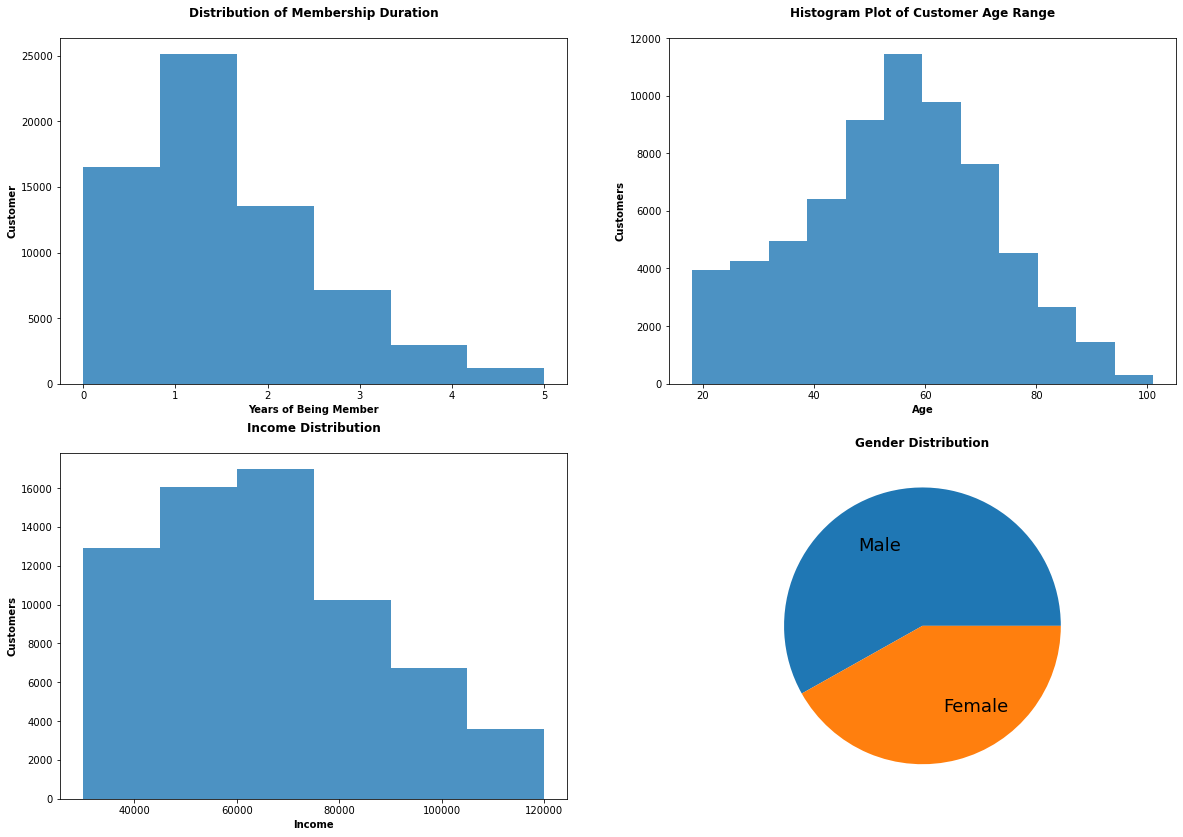

In [40]:
plt.subplots(figsize=(20, 14));

### Length of Membership
plt.subplot(2,2,1)
plt.title("Distribution of Membership Duration\n",
         fontweight ="bold")
num_bins = 6
n, bins, patches = plt.hist(offer['membership'], num_bins, 
                            color ='tab:blue',
                            alpha = 0.8)

plt.xlabel('Years of Being Member', fontweight ="bold")
plt.ylabel('Customer', fontweight ="bold")


### Age Distribution
plt.subplot(2,2,2)
plt.title('Histogram Plot of Customer Age Range\n',
          fontweight ="bold")
num_bins = 12
n, bins, patches = plt.hist(offer['age'], num_bins, 
                            color ='tab:blue',
                            alpha = 0.8)

plt.xlabel('Age', fontweight ="bold")
plt.ylabel('Customers', fontweight ="bold")
  
### Income Distribution
plt.subplot(2,2,3)
plt.title("Income Distribution\n", fontweight ="bold")

num_bins = 6
n, bins, patches= plt.hist(offer['income'], num_bins, 
                            color ='tab:blue',
                            alpha = 0.8)
plt.xlabel('Income', fontweight ="bold")
plt.ylabel('Customers', fontweight ="bold")

### Gender Distribution
plt.subplot(2,2,4)
gender_m = offer[offer['gender'] == 'M'].gender.count()
gender_f = offer[offer['gender'] == 'F'].gender.count()
gender = [gender_m , gender_f ]
labels=['Male', 'Female']

plt.title("Gender Distribution", fontweight ="bold")
plt.pie(gender, labels=labels,  labeldistance=0.6, textprops={'fontsize': 18})

plt.show()

In terms of gender, there is more men in the customer group than women. At the same time, it is interesting that most of the customer in the group seem to be around 40-70, peaking round 50+, a particularly mature customer group. It might be because the campaign intentionally target this group of mature customer, being naturally high power spending group(due to age). The mode of income is around 60000+

Dividing the profile dataframe into 3 different income group, namely:
<ol> 
    <li> from 53000 and below 
    <li> above 53000 and below 74000
    <li> above 74000
</ol>
    
Let us see the distribution of gender and age (which we shall use the quartile percentile age  as describe in the dataframe) within this group


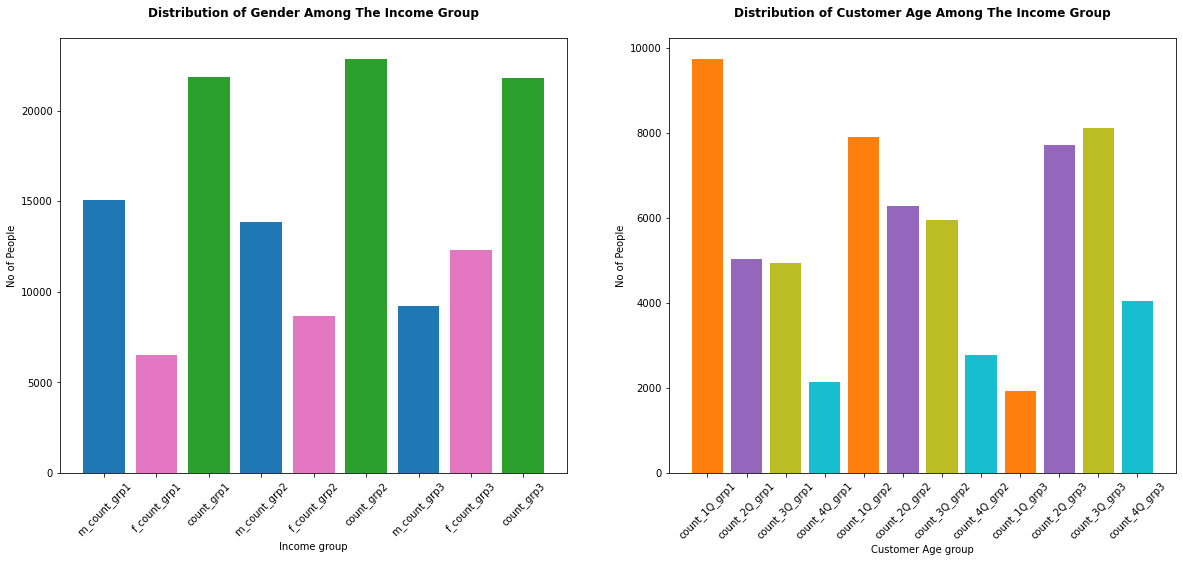

In [41]:
plt.subplots(figsize=(20, 8))

income_1  = offer.loc[offer.income <= 53000]
income_2  = offer.loc[(offer.income > 53000) & (offer.income <= 73000)]
income_3  = offer.loc[offer.income > 73000]

### Gender within the group
count_grp1   =  income_1.gender.count()
count_grp2   =  income_2.gender.count()
count_grp3   =  income_3.gender.count()

m_count_grp1 =  income_1.loc[income_1.gender== 'M'].gender.count()
f_count_grp1 =  income_1.loc[income_1.gender== 'F'].gender.count()
m_count_grp2 =  income_2.loc[income_2.gender== 'M'].gender.count()
f_count_grp2 =  income_2.loc[income_2.gender== 'F'].gender.count()
m_count_grp3 =  income_3.loc[income_3.gender== 'M'].gender.count()
f_count_grp3 =  income_3.loc[income_3.gender== 'F'].gender.count()

income =[m_count_grp1, f_count_grp1, count_grp1,
         m_count_grp2, f_count_grp2, count_grp2,
         m_count_grp3, f_count_grp3, count_grp3]
index  =['m_count_grp1', 'f_count_grp1', 'count_grp1',
         'm_count_grp2', 'f_count_grp2', 'count_grp2',
         'm_count_grp3', 'f_count_grp3', 'count_grp3']

plt.subplot(1,2,1)

color  = ['tab:blue', 'tab:pink', 'tab:green',
          'tab:blue', 'tab:pink', 'tab:green',
          'tab:blue', 'tab:pink', 'tab:green']

plt.title("Distribution of Gender Among The Income Group\n",
         fontweight ="bold")

plt.ylabel("No of People")
plt.xlabel("Income group")

plt.bar(index, height=income, color = color)

plt.xticks(rotation=45)

### Age within the group
count_1Q_grp1   =  income_1.loc[income_1.age <= 45].age.count()
count_2Q_grp1   =  income_1.loc[(income_1.age > 45) & (income_1.age <= 58)].age.count()
count_3Q_grp1   =  income_1.loc[(income_1.age > 58) & (income_1.age <= 73)].age.count()
count_4Q_grp1   =  income_1.loc[income_1.age >73].age.count()
count_1Q_grp2   =  income_2.loc[income_2.age <= 45].age.count()
count_2Q_grp2   =  income_2.loc[(income_2.age > 45) & (income_2.age <= 58)].age.count()
count_3Q_grp2   =  income_2.loc[(income_2.age > 58) & (income_2.age <= 73)].age.count()
count_4Q_grp2   =  income_2.loc[income_2.age >73].age.count()
count_1Q_grp3   =  income_3.loc[income_3.age <= 45].age.count()
count_2Q_grp3   =  income_3.loc[(income_3.age > 45) & (income_3.age <= 58)].age.count()
count_3Q_grp3   =  income_3.loc[(income_3.age > 58) & (income_3.age <= 73)].age.count()
count_4Q_grp3   =  income_3.loc[income_3.age >73].age.count()


plt.subplot(1,2,2)

color  = ['tab:orange', 'tab:purple', 'tab:olive', "tab:cyan",
          'tab:orange', 'tab:purple', 'tab:olive', "tab:cyan",
          'tab:orange', 'tab:purple', 'tab:olive', "tab:cyan"]
income =[count_1Q_grp1, count_2Q_grp1, count_3Q_grp1, count_4Q_grp1, 
         count_1Q_grp2, count_2Q_grp2, count_3Q_grp2, count_4Q_grp2,
         count_1Q_grp3, count_2Q_grp3, count_3Q_grp3, count_4Q_grp3]

index  =['count_1Q_grp1', 'count_2Q_grp1','count_3Q_grp1', 'count_4Q_grp1',
         'count_1Q_grp2', 'count_2Q_grp2', 'count_3Q_grp2', 'count_4Q_grp2',
         'count_1Q_grp3', 'count_2Q_grp3', 'count_3Q_grp3', 'count_4Q_grp3',]

plt.bar(index, height=income, color = color)
plt.xticks(rotation=45)

plt.title("Distribution of Customer Age Among The Income Group\n",
         fontweight ="bold")

plt.ylabel("No of People")
plt.xlabel("Customer Age group")
plt.show()

Let us first talk about the age grouping within the income group. 

Observation
<ul>
    <li>As expected, the youngest of the group dominates the lower income (as probably they have not been in workforce for too long) and they almost twice as many when compared to the rest.
    <li>The rest of the age-group exhibit increasing number of people when the income goes higher. 
    <li>There is almost no difference between the number of people in the 3 income group of age group 45-58 and 58-73.        
</ul>

For the income plot,  there is more males than female are found in the lower and mid-income level but the trend reverse for the high-level income group. This may be due to that at higher income group, it will require typically less manual and technical work which male could excel in but rather in sales and management jobs.


In [42]:
from scipy import stats

def is_equal_variance(d1, d2, alpha):
    """
    Method for performing stats.levene test on two input samples. 
    As returns we get a boolian if sample variances are equal.

    Args:
        d1, d2 (pd.DataSeries): input sample data
        alpha (float): alpha value as proportion 

    Returns:
        boolian: true if variances between input distributions are equal (p > alpha), false otherwise (p <= alpha)
        W: test statistic as float
        p: p value for the test
    """
    ### check if variances are equal   
    W, p = stats.levene(d1, d2)
    if p <= alpha:
        print(f"group variances unequal: W = {W:.4f}, p = {p:.4f}")
        return False        
    else:
        print(f"group variances equal: W = {W:.4f}, p = {p:.4f}")
        return True

def are_normal(d1, d2, alpha):
    """
    Method for performing stats.normaltest on two input samples and returns boolian if sample distibutions are normal 
    As return we get a boolian if sample distibutions are normal.

    Args:
        d1, d2 (pd.DataSeries): input sample data
        alpha (float): alpha value as proportion 

    Returns:
        boolian: true if sample distributions are normal (p > alpha), false otherwise (p <= alpha)
    """
    ### check if sample distributions are normal   
    for d in [d1, d2]:
        k2, p = stats.normaltest(d)
        if p <= alpha:
            print(f"sample distribution not normal")
            return False
    return True

def t_test(d1, d2, alpha):
    """
    Method for performing t-test on two sample distributions:
        Welch's t-test for unequal variance
        independent t-test for equal variance 
    For non-normal distributions of groups, sample size has to be of large size (appr. > 50) 
    to get a valid t-test on a non normal distribution.
        
    Args:
        d1, d2 (pd.DataSeries): input sample data
        alpha (float): alpha value as proportion 
    
    Returns:
        statistic (float): test statistic
        p (float): p value for marginal significance
        interpretation (string): interpretation of statistical significance for the two means
    """
    ### check of equal variance
    equal_var = is_equal_variance(d1, d2, alpha)
    
    ### check if group values are normally distributed
    normal = are_normal(d1, d2, alpha)    
    
    ### select appropriate test
    if not equal_var:
        print("Welch's t-test on non-normal distributed samples with unequal variances:")
        statistic, p = stats.ttest_ind(d1, d2, equal_var = equal_var)
    else:
        print("Independent t-test:")
        statistic, p = stats.ttest_ind(d1, d2, equal_var = equal_var) 
        
    ### t-test interpretation 
    significant = "statistically significant" if p <= alpha else "not statistically significant"
    interpretation = f"mean difference between groups is {significant}."
    
    return statistic, p, interpretation 

def compare_group_means(d1, d2, alpha):
    """
    Method for performing sample means comparison with statistics summary of samples, 
    mean difference calulation, effect size test and t-test. 
    
    Args:
        d1, d2 (pd.DataSeries): input sample data
        alpha (float): alpha value as proportion 
    
    Returns: 
        print statements for statistics of samples, mean difference calulation, effect size test and t-test
    """
    
    ### aggregate statistics
    print ("sample statistics:")
    d1_describe = d1.agg(["count", "mean", "median", "std"])
    d2_describe = d2.agg(["count", "mean", "median", "std"])
    display(d1_describe, d2_describe)
    
    ### calculate difference between group means
    diff = d1.mean() - d2.mean()
    diffp = 100.0 * abs(diff) / d1.mean()
    print(f"mean difference between groups: {diff:.4f}({diffp:.2f}%)\n")
    
    ### Perform t-test
    statistic, p, interpretation = t_test(d1, d2, alpha)
    print(f"statistic = {statistic:.4f} | p-value = {p:.4f} =>> {interpretation}")

Comparing the 4 main client side factors namely (age, income, gender, length of membership)

In [43]:
### prepare data 
gender_1 = offer[offer["offer_completed"] == 1]["gender"]
gender_0 = offer[offer["offer_completed"] == 0]["gender"]

gender_1 = gender_1.apply(lambda x: 1 if x == "F" else 0)
gender_0 = gender_0.apply(lambda x: 1 if x == "F" else 0)

### print results of comparison between customer income with and without promotion success 
print("Gender - group means comparison between success and failure")
display(compare_group_means(gender_1, gender_0, alpha = 0.05))

Gender - group means comparison between success and failure
sample statistics:


count     18534.000000
mean          0.469569
median        0.000000
std           0.499087
Name: gender, dtype: float64

count     47967.000000
mean          0.390956
median        0.000000
std           0.487970
Name: gender, dtype: float64

mean difference between groups: 0.0786(16.74%)

group variances unequal: W = 342.5675, p = 0.0000
sample distribution not normal
Welch's t-test on non-normal distributed samples with unequal variances:
statistic = 18.3250 | p-value = 0.0000 =>> mean difference between groups is statistically significant.


None

In [44]:
### prepare data 
length_1 = offer[offer["offer_completed"] == 1]["membership"]
length_0 = offer[offer["offer_completed"] == 0]["membership"]

### print results of comparison between customer income with and without promotion success 
print("Gender - group means comparison between success and failure")
display(compare_group_means(length_1, gender_0, alpha = 0.05))


Gender - group means comparison between success and failure
sample statistics:


count     18534.000000
mean          1.569602
median        1.000000
std           1.146001
Name: membership, dtype: float64

count     47967.000000
mean          0.390956
median        0.000000
std           0.487970
Name: gender, dtype: float64

mean difference between groups: 1.1786(75.09%)

group variances unequal: W = 8671.4581, p = 0.0000
sample distribution not normal
Welch's t-test on non-normal distributed samples with unequal variances:
statistic = 135.3567 | p-value = 0.0000 =>> mean difference between groups is statistically significant.


None

In [45]:
### prepare data 
income_1 = offer[offer["offer_completed"] == 1]["income"]
income_0 = offer[offer["offer_completed"] == 0]["income"]

### print results of comparison between customer income with and without promotion success 
print("Income - group means comparison between success and failure")
display(compare_group_means(income_1, income_0, alpha = 0.05))

Income - group means comparison between success and failure
sample statistics:


count     18534.000000
mean      69127.711233
median    68000.000000
std       21123.957700
Name: income, dtype: float64

count     47967.000000
mean      63920.299372
median    61000.000000
std       21639.450539
Name: income, dtype: float64

mean difference between groups: 5207.4119(7.53%)

group variances unequal: W = 10.0675, p = 0.0015
sample distribution not normal
Welch's t-test on non-normal distributed samples with unequal variances:
statistic = 28.3086 | p-value = 0.0000 =>> mean difference between groups is statistically significant.


None

In [46]:
### prepare data series for statistical examination
age_1 = offer[offer["offer_completed"] == 1]["income"]
age_0 = offer[offer["offer_completed"] == 0]["income"]

### print results of comparison between customer income with and without promotion success 
print("Age - group means comparison  between success and failure")
display(compare_group_means(age_1, age_0, alpha = 0.05))

Age - group means comparison  between success and failure
sample statistics:


count     18534.000000
mean      69127.711233
median    68000.000000
std       21123.957700
Name: income, dtype: float64

count     47967.000000
mean      63920.299372
median    61000.000000
std       21639.450539
Name: income, dtype: float64

mean difference between groups: 5207.4119(7.53%)

group variances unequal: W = 10.0675, p = 0.0015
sample distribution not normal
Welch's t-test on non-normal distributed samples with unequal variances:
statistic = 28.3086 | p-value = 0.0000 =>> mean difference between groups is statistically significant.


None

/home/monki/anaconda3/envs/cuda_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/monki/anaconda3/envs/cuda_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/monki/anaconda3/envs/cuda_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

Text(51.14421164550629, 0.015, 'mean age: 53.8')

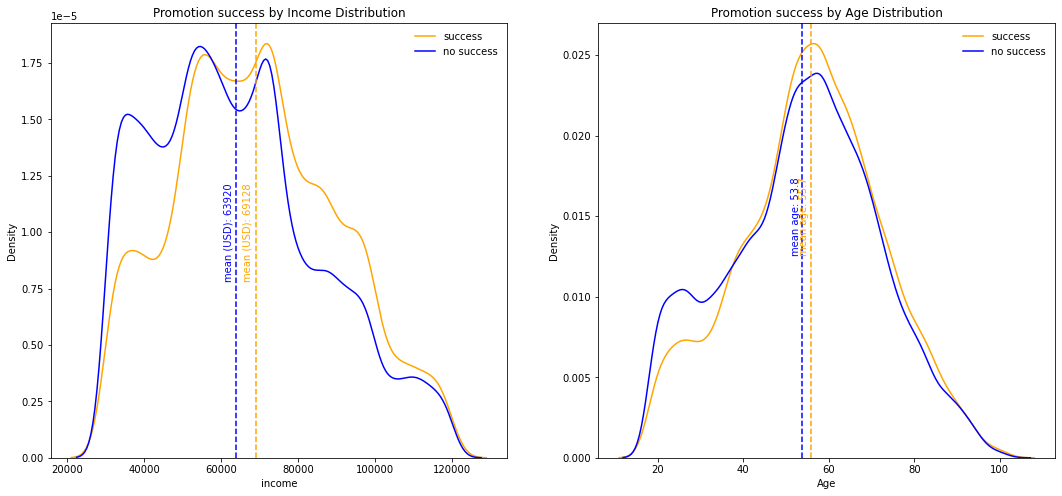

In [47]:
plt.figure(figsize = [18, 8])

### left plot top: promotion success by customer's income
plt.subplot(1, 2, 1)
sns.distplot(offer.loc[offer["offer_completed"] == 1]["income"], 
             hist = False, color = "orange", kde_kws = {'shade': False})
sns.distplot(offer.loc[offer["offer_completed"] == 0]["income"], 
             hist = False, color = "blue", kde_kws = {'shade': False})

plt.xlabel("income")
plt.title("Promotion success by Income Distribution")
plt.legend(["success", "no success"], frameon = False)
plt.axvline(x = offer[offer["offer_completed"] == 1]["income"].mean(), 
            color = "orange", linestyle = "dashed", linewidth = 1.5)
plt.text(0.95 * offer.loc[offer["offer_completed"] == 1]["income"].mean(), 0.00001, 
         f'mean (USD): {offer.loc[offer["offer_completed"] == 1]["income"].mean():.0f}', 
         rotation = 90, verticalalignment = "center", color = "orange")
plt.axvline(x = offer[offer["offer_completed"] == 0]["income"].mean(), 
            color = "blue", linestyle = "dashed", linewidth = 1.5)
plt.text(0.95 * offer.loc[offer["offer_completed"] == 0]["income"].mean(), 0.00001, 
         f'mean (USD): {offer.loc[offer["offer_completed"] == 0]["income"].mean():.0f}', 
         rotation = 90, verticalalignment = "center", color = "blue")

### right plot top: promotion success by customer's age
plt.subplot(1, 2, 2)
sns.distplot(offer.loc[offer["offer_completed"] == 1]["age"], 
             hist = False, color = "orange", kde_kws = {'shade': False})
sns.distplot(offer.loc[offer["offer_completed"] == 0]["age"], 
             hist = False, color = "blue", kde_kws = {'shade': False})
plt.xlabel("Age")
plt.title("Promotion success by Age Distribution")
plt.legend(["success", "no success"], frameon = False)
plt.axvline(x = offer[offer["offer_completed"] == 1]["age"].mean(), 
            color = "orange", linestyle = "dashed", linewidth = 1.5)
plt.text(0.95 * offer.loc[offer["offer_completed"] == 1]["age"].mean(), 0.015, 
         f'mean age: {offer.loc[offer["offer_completed"] == 1]["age"].mean():.1f}', 
         rotation = 90, verticalalignment = "center", color = "orange")
plt.axvline(x = offer[offer["offer_completed"] == 0]["age"].mean(), 
            color = "blue", linestyle = "dashed", linewidth = 1.5)
plt.text(0.95 * offer.loc[offer["offer_completed"] == 0]["age"].mean(), 0.015, 
         f'mean age: {offer.loc[offer["offer_completed"] == 0]["age"].mean():.1f}', 
         rotation = 90, verticalalignment = "center", color = "blue")

## Offer

###### Which is the most effective channel in dispensing out information?

First let us have an overview of the dataframe

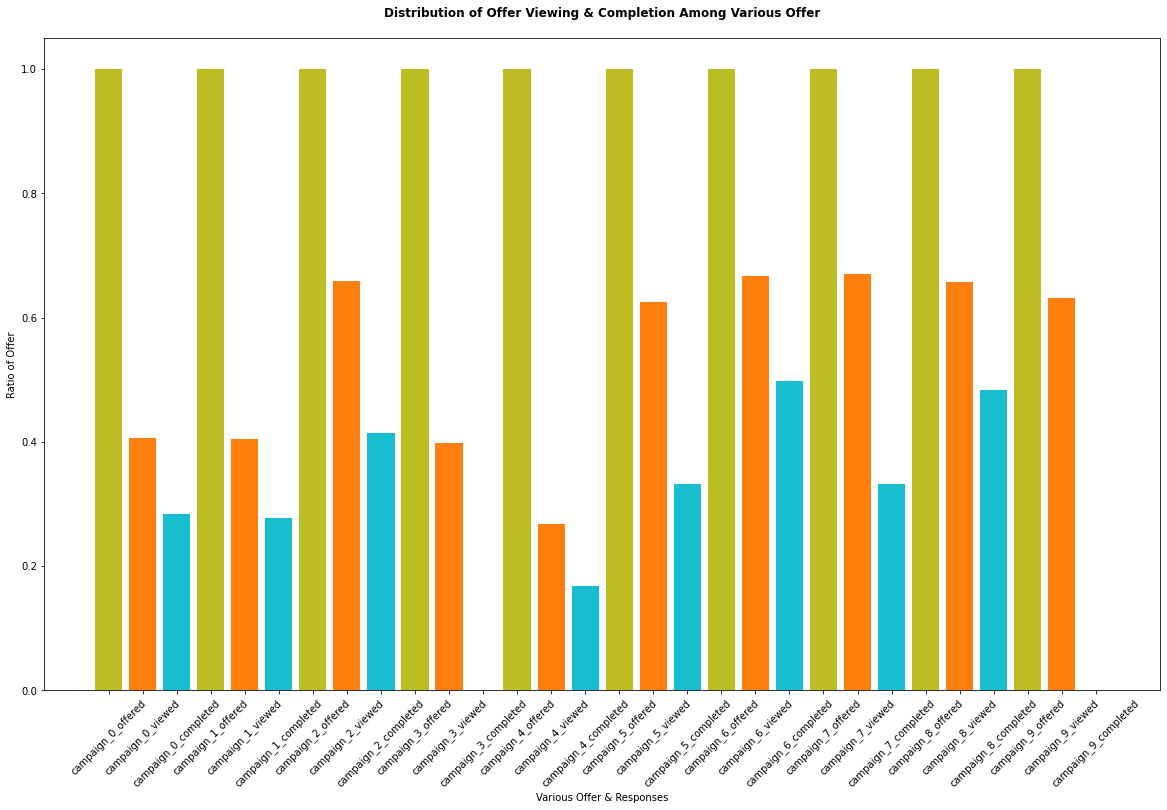

   offer_type  difficulty  reward  duration  completion
0           1          10      10       168    0.283470
1           1          10      10       120    0.277786
2           0           0       0        96    0.413929
3           1           5       5       168    0.000000
4           2          20       5       240    0.168153
5           2           7       3       168    0.331588
6           2          10       2       240    0.498497
7           0           0       0        72    0.332170
8           1           5       5       120    0.484147
9           2          10       2       168    0.000000


In [48]:
plt.subplots(figsize=(20, 12))

n          = offer.offer_id.nunique()
offer_list = offer.offer_id.unique()

value = []
for i in range(0,n):
    value.append(1.0)
    tmp  = offer[offer.offer_id==offer_list[i]]
#     print(tmp)
    value.append(tmp.offer_viewed.sum() /tmp.shape[0])
    value.append(tmp.offer_completed.sum() /tmp.shape[0])

color = [] 
for i in range(0,n):
    color.append("tab:olive")
    color.append("tab:orange")
    color.append("tab:cyan")
    
index = []
for i in range(0,n):
    index.append("campaign_" + str(i) + "_offered")
    index.append("campaign_" + str(i) + "_viewed")
    index.append("campaign_" + str(i) + "_completed")

plt.bar(index, height=value, color = color)

plt.xticks(rotation=45)

plt.title("Distribution of Offer Viewing & Completion Among Various Offer\n",
         fontweight ="bold")

plt.ylabel("Ratio of Offer")
plt.xlabel("Various Offer & Responses")


plt.show()

success  = pd.DataFrame()
success['offer_type'] = portfolio_df.offer_type
success['difficulty'] = portfolio_df.difficulty
success['reward']     = portfolio_df.reward
success['duration']   = portfolio_df.duration
success['completion'] = value[2::3]
# success['offer'] = value[3::4]


print(success)


#### Campaign 2,7,9, namely offer types: {discount, discount, bogo}, have above 40% completion rate. 

Observation
<ul>
    <li> At first glance, it seem that difficulty matters most in almost all types of offer. The more difficult it is, the lower is the completion rate,no matter the reward and time duration of the reward
    <li> The type of offer seems to rank the next in the terms of effect, with discount offer being higher
    <li> The influence of rewards seem to matter after next
    <li> Duration seem to matter the least in all of this effect
</ul>

But is that so?

Let us go back to the question in which media channel offers the greatest attention. We would say media has the effect of bring attention to, ie in this case for customer to view the offer. Whether to complete it, would depend on the reward, difficulty of the offer and nature of customer

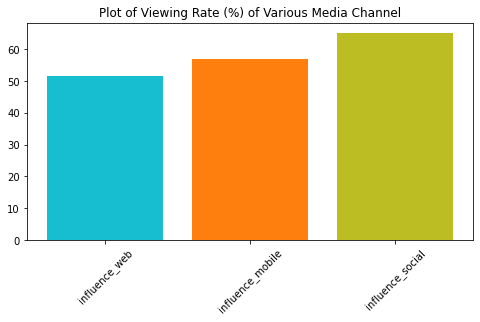

In [49]:
plt.subplots(figsize=(8, 4))

influence_web    = (offer.offer_viewed * offer.web).sum() / ( offer.web).sum()  * 100
influence_mobile = (offer.offer_viewed * offer.mobile).sum() / (offer.mobile).sum() * 100
influence_social = (offer.offer_viewed * offer.social).sum() / (offer.social).sum() * 100

influence = [influence_web, influence_mobile, influence_social] 
label = ['influence_web', 'influence_mobile', 'influence_social']

color = ['tab:cyan', 'tab:orange', 'tab:olive']

plt.xticks(rotation=45)
plt.title('Plot of Viewing Rate (%) of Various Media Channel')

plt.bar(label, influence, color=color)

### Lastly to show
plt.show()

Not surprising, customer will respond more to their social media compared to other form of communication. This maybe because of social media give a more human touch and directed advertisement effect compared to mobile. Mobile, though personal, do not give people the feeling of human interaction.

<BarContainer object of 8 artists>

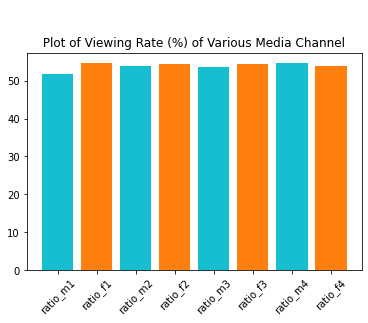

In [50]:
offer_m1 = offer.loc[ (offer.gender =='M') & (offer.age <= 45) ]
offer_f1 = offer.loc[ (offer.gender =='F') & (offer.age <= 45) ]
offer_m2 = offer.loc[(offer.gender =='M') & ( (offer.age > 45) & (offer.age <= 58))  ]
offer_f2 = offer.loc[ (offer.gender =='F') & ( (offer.age > 45) & (offer.age <= 58))  ]
offer_m3 = offer.loc[(offer.gender =='M') & ( (offer.age > 58) & (offer.age <= 73))]
offer_f3 = offer.loc[ (offer.gender =='F') & ( (offer.age > 58) & (offer.age <= 73)) ]
offer_m4 = offer.loc[(offer.gender =='M') & (offer.age > 73)]
offer_f4 = offer.loc[ (offer.gender =='F') & (offer.age > 73) ]

ratio_m1 = offer_m1.offer_viewed.sum() / offer_m1.shape[0]  * 100
ratio_f1 = offer_f1.offer_viewed.sum() / offer_f1.shape[0]  * 100
ratio_m2 = offer_m2.offer_viewed.sum() / offer_m2.shape[0]  * 100
ratio_f2 = offer_f2.offer_viewed.sum() / offer_f2.shape[0]  * 100
ratio_m3 = offer_m3.offer_viewed.sum() / offer_m3.shape[0]  * 100
ratio_f3 = offer_f3.offer_viewed.sum() / offer_f3.shape[0]  * 100
ratio_m4 = offer_m4.offer_viewed.sum() / offer_m4.shape[0]  * 100
ratio_f4 = offer_f4.offer_viewed.sum() / offer_f4.shape[0]  * 100

influence = [ratio_m1, ratio_f1, 
             ratio_m2, ratio_f2,
             ratio_m3, ratio_f3, 
             ratio_m4, ratio_f4] 
label    =   ['ratio_m1', 'ratio_f1', 
             'ratio_m2', 'ratio_f2',
             'ratio_m3', 'ratio_f3', 
             'ratio_m4', 'ratio_f4'] 

color = ['tab:cyan', 'tab:orange',
        'tab:cyan', 'tab:orange',
        'tab:cyan', 'tab:orange',
        'tab:cyan', 'tab:orange']

plt.xticks(rotation=45)
plt.title('\n\n Plot of Viewing Rate (%) of Various Media Channel ')

plt.bar(label, influence, color=color)

The number of offers for each campaign is largely the same. So we can say, it is safe to compare between each 

It seem to show that social media has great influence on the client. Most of the client actually responded to the campaign when it is hosted on social media

###### Which group (age, income, membership length) of customers appear to be more responsive towards the promotion

The customer response for Young Male is particularly poor. While the rest of the group exhibits at least 38% of offer uptake rate, Young Male group seem to have relatively 'poorer' uptake rate at about 28.2%

###### Is there link between the offer given and the target group?

###### Which type of promotional offer most appeal to which group of customer?

## Modeling and Evaluation

###### Can we determine promotion success once the customer has viewed the offer?

First we have to filter out the offer dataframe

<ol>
    <li>to obtain the only those offer that has been viewed by customer</li>
    <li>to remove those informational campaign since there is no chance for them to succeed</li>
    <li> remove features that do not have not have effect on promotion success</li>
    <li> Normalize features </li>
    </ol>

Offer that has been viewed by customer

In [51]:
offer_view = offer[offer.offer_viewed ==1 ]


Remove informational campaign 

In [52]:
offer_view = offer_view.loc[offer_view.offer_id != "3f207df678b143eea3cee63160fa8bed"]
offer_view = offer_view.loc[offer_view.offer_id != "5a8bc65990b245e5a138643cd4eb9837"]

No effect Features

In [53]:
offer_view = offer_view.drop(['email', 'offer_viewed'], axis=1)

In [54]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [57]:
chosen_column = ['income', 'age','duration']
offer_view_chosen  = offer_view[chosen_column] 
temp  = normalize(offer_view_chosen)

offer_view[chosen_column]=temp 

offer_view

,person,offer_completed,offer_id,reward,difficulty,duration,offer_type,web,mobile,social,gender,age,membership,income
0,78afa995795e4d85b5d9ceeca43f5fef,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,5,0.4,1,1,1,0,F,0.686747,1,0.777778
1,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,2,10,0.4,2,1,1,0,M,0.602410,0,0.444444
4,aa4862eba776480b8bb9c68455b8c2e1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,20,1.0,2,1,0,0,F,0.518072,1,0.300000
5,31dda685af34476cad5bc968bdb01c53,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,20,1.0,2,1,0,0,F,0.530120,2,0.455556
12,1e9420836d554513ab90eba98552d0a9,0,ae264e3637204a6fb9bb56bc8210ddfd,10,10,0.4,1,0,1,1,M,0.048193,1,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66486,1966fa40d2f84620b2b1b9b64f8e0209,1,f19421c1d4aa40978ebb69ca19b0e20d,5,5,0.0,1,1,1,1,M,0.795181,2,0.700000
66493,670626b55bfb4ba39c85b27cc7cca527,1,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,20,1.0,2,1,0,0,M,0.036145,2,0.100000
66496,d087c473b4d247ccb0abfef59ba12b0e,1,ae264e3637204a6fb9bb56bc8210ddfd,10,10,0.4,1,0,1,1,M,0.457831,2,0.233333
66498,6d5f3a774f3d4714ab0c092238f3a1d7,0,2298d6c36e964ae4a3e7e9706d1fb8c2,3,7,0.4,2,1,1,1,F,0.325301,0,0.266667


In [ ]:
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(offer_view['income'].values)

In [ ]:
offer_view

# Selection of Features

There is a plethora of features within the dataset we would need to fish out the most relevant features in our studies

In [ ]:
plt.figure(figsize=(9, 6))
### Plot Heatmap with feature multicollinearity
sns.heatmap(offer_view.corr(), annot = True, vmin = -1, vmax = 1, fmt= ".2f", cmap = "coolwarm")
plt.title("Feature Multicollinearity - offer", fontsize = "x-large")
plt.xticks(rotation = 45, ha = "right");

As we want to predict promotion success we need suitable features for our algorithms. In the heatmap above we compare feature multicollinearity for all features in dataframe of one single offer (here we have choosen offer 2) in realtion to the target variable promotion success.

We will select our features as follow:

    customer_id is not a variable as it is just an id
    offer_completed is the target variable or y
    reward, difficulty, duration, are variables which are for each individual offer_id always the same and therefore there is no multicollinearity and these variables wont influence the predictive performance
    membership, income and gender have linear correlation to target variable promotion success and will be selected as featrues for prediction

Finally we prepare features data frame (X) and target data series (y) for each offer id.

In [ ]:
### select target variable
target_col = ["offer_completed"]

### select feature varibles
features_col = ["age", "became_member_on", "income year (USD)", 
                "gender F", "gender M", "gender O"]

def split_features_target(df, features_col, target_col):
    """
    Method for filtering features and target Series from master dataframe

    Args:
        df (pd.DataFrame): master Dataframe containing feature and target columns 
        features_col (list): list with selected features column names
        target_col (list): list with selected target column name

    Returns:
        X (pd.DataFrame): DataFrame with selected feature columns
        y (pd.DataSeries): Series with selected target column
    """
    X = df[features_col]
    y = df[target_col]
    return X, y

### prepare dataframes X with feature variables and data Series y with target variable  
X1, y1 = split_features_target(master_offer1, features_col, target_col)
X2, y2 = split_features_target(master_offer2, features_col, target_col)
X4, y4 = split_features_target(master_offer4, features_col, target_col)
X5, y5 = split_features_target(master_offer5, features_col, target_col)
X6, y6 = split_features_target(master_offer6, features_col, target_col)
X7, y7 = split_features_target(master_offer7, features_col, target_col)
X9, y9 = split_features_target(master_offer9, features_col, target_col)
X10, y10 = split_features_target(master_offer10, features_col, target_col)

In [ ]:
### select feature varibles for MinMax scaling
normalize_col = ["age", "became_member_on", "income year (USD)"]

def scale_features(normalize_col, X):
    """
    Method for scaling selected features from features dataframe

    Args:
        features_col (list): list with selected feature column names to be scaled
        X (pd.DataFrame): DataFrame with feature columns

    Returns:
        X (pd.DataFrame): DataFrame with feature columns where data of selected columns were scaled
    """
    scaler = MinMaxScaler()
    X[normalize_col] = scaler.fit_transform(X[normalize_col])
    return X

### recale 
X1_scaled = scale_features(normalize_col, X1)
X2_scaled = scale_features(normalize_col, X2)
X4_scaled = scale_features(normalize_col, X4)
X5_scaled = scale_features(normalize_col, X5)
X6_scaled = scale_features(normalize_col, X6)
X7_scaled = scale_features(normalize_col, X7)
X9_scaled = scale_features(normalize_col, X9)
X10_scaled = scale_features(normalize_col, X10)

## Evaluation metrics

There are numerous metrics for evaluating the an algorithm peformance. We will discuss the most common evaluation metrics used in the industry and decide which ones would fit our classification task

With the prediction results, this would be a binary classification (with 2 classes) and will produce a 2 x 2 confusion matrix similar to below

<img src="confusion_matrix.png" width="480" height="720">


The output are 4 numbers, in clockwise rotation direction 
    True Positive (Tp)
    False Positive (Fp)
    True Negative (Tn) 
    False Negative (Fn) 

The diagonal numbers (from top left to bottom right) represent the targets for which the predicted labels are equal to the test labels (Tp, Tn). In summary, the higher the diagonal numbers the better is the our algorithm  performance [5].

Evaluation metrics Terminology[5]:

<ul>
    <li>Accuracy: measurement of how often the classifier correctly predicts: (Tp + Tn)/(Tp + Fp + Fn + Tn). The output is a number in range [0, 1] where 1 is best and 0 is worst value. We can use the accuracy metric for classifications with roughly balanced output where our classes (success vs. no success) are roughly equal in size. For imbalanced output the validity of this metric dicreases.</li>
    <li>Positive predictive value or Precision: explains how many of the correctly predicted cases actually turned out to be positive: Tp/(Tp + Fp). The output is a number in range [0, 1] where 1 is best and 0 is worst value.</li>
    <li>Sensitivity or Recall: is proportion of actual positive cases which are correctly classified: Tp/(Tp + Fn). The output is a number in range [0, 1] where 1 is best and 0 is worst value.</li>
    <li>Specificity: is proportion of actual negative cases which are correctly classified: Tn/(Tn + Fp). The output is a number in range [0, 1] where 1 is best and 0 is worst value.</li>
    <li>F1-score: is harmonic mean of Precision and Recall: 2 * (precision * recall) / (precision + recall). The output is a number in range [0, 1] where 1 is best and 0 is worst value. The F1-score can be used for classifications with balanced and imbalanced output where false positive and false negative are equally important</li>
</ul>


Our predictive model is a classification model with binary output (1 for success and 0 for no success). We will perform modeling on algorithms with class output with probability output like Logistic Regression and Random Forest which converts probability output to class output.

Algorithms

    Random Forest (RF): is a meta estimator that fits a number of Decision Tree classifiers on various sub-samples of a dataset. It uses averaging to improve the predictive accuracy and control over-fitting. Random Forest algorithm generates in general more accurate predictions and is less prone to over-fitting than Decision Tree. However, it utilize more computational resources than Decision Tree

We will choose algorithm with best predictive performance for our case by going through following steps:

    Firstly we check if the predicted classes are roughly balanced. If Precision and Recall scores are roughly equal than the output is roughly balanced. In this case the F1 score also yields close to both aforementioned scores.
    In case one or more algorithm have roughly balanced classes we pick the algorithm with the highest Accuracy score. The Accuracy of algorithms with inbalanced output will be ignored.
    In case there is more than one algorithm in range of the highest Accuracy and F1 score we look closer at Precision and Recall scores. As for our business it is better to send out offers to customer who would't respond to it than to not send out offers to customers that would respond, we prefer the classifier to predict more False Positives than False Negatives. Therefore we need to have the Recall score higher than the Precision score.
    In case all algorithms to be compared have imbalanced classes we pay more attention to F1 score and pick algorithm with highest F1 score where Recall is higher than Precision score.

Evaluation metrics [12]:

<ul>
    <li>Accuracy: measurement of how often the classifier correctly predicts: (Tp + Tn)/(Tp + Fp + Fn + Tn). The output is a number in range [0, 1] where 1 is best and 0 is worst value. We can use the accuracy metric for classifications with roughly balanced output where our classes (success vs. no success) are roughly equal in size. For imbalanced output the validity of this metric dicreases.</li>
    <li>Positive predictive value or Precision: explains how many of the correctly predicted cases actually turned out to be positive: Tp/(Tp + Fp). The output is a number in range [0, 1] where 1 is best and 0 is worst value.</li>
    <li>Sensitivity or Recall: is proportion of actual positive cases which are correctly classified: Tp/(Tp + Fn). The output is a number in range [0, 1] where 1 is best and 0 is worst value.</li>
    <li>Specificity: is proportion of actual negative cases which are correctly classified: Tn/(Tn + Fp). The output is a number in range [0, 1] where 1 is best and 0 is worst value.</li>
    <li>F1-score: is harmonic mean of Precision and Recall: 2 * (precision * recall) / (precision + recall). The output is a number in range [0, 1] where 1 is best and 0 is worst value. The F1-score can be used for classifications with balanced and imbalanced output where false positive and false negative are equally important</li>
</ul>

We will compare our result between using RF Classifier and Neural Networks

In [ ]:
def classifier(classifier, offer_id, X_train, X_test, y_train, y_test):
    """
    Method for training classifier and predicting on test set. 
    Output are: the trained classifier and the evaluation metrics accuracy and f1-score

    Args:
        classifier: classifier ith parameters, if procurable including GridSearchCV for parameter tuning
        offer_id (int): integer with offer_id according master dataframe
        X_train (pd.DataFrame): DataFrame with feature columns of train set
        y_train (pd.DataSeries): Series with target column of train set
        X_test (pd.DataFrame): DataFrame with feature columns of test set
        y_test (pd.DataSeries): Series with target column of test set

    Returns:
        clf: trainied classifier
        accuracy (float): accuracy score 
        f1 (float): f1-score
        recall (float): recall score
        precision (float): precision score
    """
    ### train classifier more
    clf.fit(X_train, y_train)
    
    ### predict on test set
    pred = clf.predict(X_test)
    ### accuracy score
    accuracy = round(accuracy_score(y_test, pred)*100,2)
    ### f1 score
    f1 = round(f1_score(y_test, pred)*100,2)
    ### recall score
    recall = round(recall_score(y_test, pred)*100,2)
    ### precision score
    precision = round(precision_score(y_test, pred)*100,2)
    
    print("#######################################################")
    ### confusion matrix
    cm = confusion_matrix(y_test, pred)
    print("Offer {} - confusion matrix:".format(offer_id))
    print(cm, "\n")
    
    ### classification report
    cr = classification_report(y_test, pred, target_names = ["0", "1"])
    print("Offer {} - classification report:".format(offer_id))
    print(cr)  
    
    print ("Offer {}:".format(offer_id),
           "Accuracy: {} % | F1-score: {} % \n\
        Recall: {} % | Precision: {} %".format(accuracy, f1, recall, precision),"\n")
    
    return clf, accuracy, f1, recall, precision

In [ ]:
%%time

### define parameters and classifier
parameters = {"bootstrap": [True],
              "max_depth": [2, 6, 10], 
              "max_features": [0.5, 1, 2], 
              "min_samples_leaf": [1, 5], 
              "min_samples_split": [2, 5], 
              "n_estimators": [10, 20]}
RF = RandomForestClassifier()
clf = GridSearchCV(RF, parameters, scoring = "roc_auc", cv = 4, n_jobs = 4, verbose = 2)

### train classifier, predict on test set and compute evaluation metrics
rf_1, acc_rf_1, f1_rf_1, r_rf_1, p_rf_1 = classifier(clf, 1, X1_train, X1_test, y1_train, y1_test)
rf_2, acc_rf_2, f1_rf_2, r_rf_2, p_rf_2 = classifier(clf, 2, X2_train, X2_test, y2_train, y2_test)
rf_4, acc_rf_4, f1_rf_4, r_rf_4, p_rf_4 = classifier(clf, 4, X4_train, X4_test, y4_train, y4_test)
rf_5, acc_rf_5, f1_rf_5, r_rf_5, p_rf_5 = classifier(clf, 5, X5_train, X5_test, y5_train, y5_test)
rf_6, acc_rf_6, f1_rf_6, r_rf_6, p_rf_6 = classifier(clf, 6, X6_train, X6_test, y6_train, y6_test)
rf_7, acc_rf_7, f1_rf_7, r_rf_7, p_rf_7 = classifier(clf, 7, X7_train, X7_test, y7_train, y7_test)
rf_9, acc_rf_9, f1_rf_9, r_rf_9, p_rf_9 = classifier(clf, 9, X9_train, X9_test, y9_train, y9_test)
rf_10, acc_rf_10, f1_rf_10, r_rf_10, p_rf_10 = classifier(clf, 10, X10_train, X10_test, y10_train, y10_test)

## Deployment

In [ ]:
### add dummy columns for gender type categories. 
dummies_gender = pd.get_dummies(customer_data["gender"], columns = ["gender"])
customer_data = pd.concat([customer_data, dummies_gender.set_index(customer_data.index)], axis = 1)
del customer_data["gender"]

### convert Dtype from object to datetime64
customer_data["became_member_on"] = pd.to_datetime(customer_data["became_member_on"])
### convert Dtype from datetime64 to ordinal
customer_data["became_member_on"] = customer_data["became_member_on"].map(datetime.datetime.toordinal)

### scale features of new customer data
def scale_feature(ref_col, scale_col):
    """
    Method for scaling one selected features column on min max values of a reference dataframe (i.e. master)

    Args:
        ref_df (pd.Series): Series with values whereof min and max values are taken for scaling
        scale_df (pd.Series): Series with values of the same category as ref_df to be scaled

    Returns:
        scaled_values (pd.Series): Series with scaled values
    """
    scaled_values = (scale_col - ref_col.min()) / (ref_col.max() - ref_col.min())

    return scaled_values

### scale columns age, become_member_on, income_year of new customer data
customer_data["age"] = scale_feature(master["age"], customer_data["age"])
customer_data["became_member_on"] = scale_feature(master["became_member_on"], customer_data["became_member_on"])
customer_data["income year (USD)"] = scale_feature(master["income year (USD)"], customer_data["income year (USD)"])


In [ ]:
### create dataframe with new customer data for prediction promomtion success
customer_id = ["customer_01", "customer_02", "customer_03", "customer_04", "customer_05", 
               "customer_06", "customer_07", "customer_08", "customer_09", "customer_10"]
age = [20, 25, 30, 35, 45, 50, 55, 60, 70, 80 ] # range: 18 - 101
became_member_on = ["2013-07-29", "2016-07-29", "2018-07-26", "2013-07-29", "2016-07-29",
                   "2018-07-26", "2013-07-29", "2015-07-29", "2017-07-29", "2017-07-29"] # range: 2013-07-29 - 2018-07-26
income_year = [60000, 40000, 100000, 100000, 70000, 40000, 30000, 80000, 40000, 100000] # range: 30000 - 120000
gender = ["M", "F", "F", "F", "O", "M", "F", "F", "F", "M"]

customer_data = pd.DataFrame(
    {"age": age,
     "became_member_on": became_member_on,
     "income year (USD)": income_year,
     "gender": gender,
     }, index = customer_id)
display(customer_data)

In [ ]:

### predict promotion success for new customer data with selected trained classifier
pred_offer_1 = rf_1.predict(customer_data)
pred_offer_2 = knn_2.predict(customer_data)
pred_offer_4 = rf_4.predict(customer_data)
pred_offer_5 = dt_5.predict(customer_data)
pred_offer_6 = svm_6.predict(customer_data)
pred_offer_7 = gnb_7.predict(customer_data)
pred_offer_9 = knn_9.predict(customer_data)
pred_offer_10 = rf_10.predict(customer_data)

### create dataframe
pred_offer = pd.DataFrame(
    {"offer_01": pred_offer_1,
     "offer_02": pred_offer_2,
     "offer_04": pred_offer_4,
     "offer_05": pred_offer_5,
     "offer_06": pred_offer_6,
     "offer_07": pred_offer_7,
     "offer_09": pred_offer_9,
     "offer_10": pred_offer_10,
     }, index = customer_id)

pred_offer["sum success"] = pred_offer[["offer_01", "offer_02", "offer_04", 
                                        "offer_05", "offer_06", "offer_07", 
                                        "offer_09", "offer_10"]].sum(axis=1)

display("Overview table with promotion success prediction for test customers", pred_offer)



### Testing out the ANN Model

In [ ]:
ann.add(keras.layers.Dense(6, activation='relu'))
ann.add(keras.layers.Dense(6, activation='relu'))
ann.add(keras.layers.Dense(4, activation = 'softmax'))

ann.compile(optimizer = 'adam', 
            loss = 'sparse_categorical_crossentropy', 
            metrics = ['accuracy'])

ann_history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=1)


ann.summary()       

In [ ]:
ann.history.params

In [ ]:
ann.evaluate(X_test , y_test)

In [ ]:
ann = keras.models.Sequential()

ann.add(keras.layers.Dense(32, input_dim=7, kernel_initializer = 'normal' ,activation='relu'))
ann.add(keras.layers.Dense(15, kernel_initializer = 'normal' ,activation='relu'))
ann.add(keras.layers.Dense(10, kernel_initializer = 'normal' ,activation='relu'))
ann.add(keras.layers.Dense(6, kernel_initializer = 'normal' ,activation='relu'))
ann.add(keras.layers.Dense(4, kernel_initializer = 'normal' ,activation = 'softmax'))

ann.compile(optimizer = 'adam', 
            loss = 'sparse_categorical_crossentropy', 
            metrics = ['accuracy'])

ann_history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=100 , verbose = 2)

ann.summary()


# References 

<ol>
    <li>Starbuck Wikipaedia, https://en.wikipedia.org/wiki/Starbucks</li>
    <li>Starbuck Company Website, https://www.starbucks.com/about-us/ </li>
    <li>https://digital.hbs.edu/platform-digit/submission/starbucks-mobile-app-a-winner-in-bridging-the-retail-digital-divide/ </li>
    <li>List of the verified oldest people, <https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people </li>
    <li> https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/ </li>   
</ol>

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Starbucks_Capstone_notebook.ipynb'])